# Imports and plot properties


In [1]:
"""
Created on Thu Feb  6 15:24:06 2020

@author: Shiva
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import pandas as pd
from pandas import read_excel
from matplotlib.font_manager import FontProperties
from scipy.ndimage.interpolation import shift
import os
import glob
import timeit
from scipy import stats
import statsmodels.stats.api as sms
from matplotlib.collections import LineCollection
from tempfile import TemporaryFile
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import seaborn as sns
from statannot import add_stat_annotation
# import numpy_indexed as npi
#print(os.path.dirname(__file__))
import itertools
import pickle
from pathlib import Path
import yaml
from ruamel.yaml import YAML
from os.path import dirname as up
import shutil
import fnmatch
flatten = itertools.chain.from_iterable

from Rat_Lever import *
#############################   Plot properties   ########################################################


font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_style('italic')
font.set_size('30')
font.set_weight('bold')

font_label = FontProperties()
font_label.set_family('serif')
font_label.set_name('Times New Roman')
font_label.set_style('italic')
font_label.set_size('25')
font_label.set_weight('bold')

    
pre_direct = '/home/shiva/Desktop/Rat_Lever_Analysis' # ubuntu directory

# Copy only ".csv" files of the experiment directory tree

In [2]:
srcDir = '/media/shiva/LaCie/Nico_BackUp_Ordi-P1PNH-5/Données Valentin/videos/Rat_1'
dstDir = '/home/shiva/Desktop/Rat_1'
copy_csv_with_directory_tree(srcDir, dstDir)
categorize_csv_to_folders(dstDir)

# Create metadata df

In [2]:
folder_list =["Square_2-5_mW_partial-MT_Nf_375", "Square_5_mW_all-RT_Nf_500","Beta_20_mW_all-RT_Nf_375",
              "Beta_15_mW_all-MT_Nf_500", "Beta_10_mW_all-RT_Nf_375","Square_5_mW_partial-MT_Nf_500"]            
exp_par_list = ['Laser_ArchT','Laser_ArchT', 'Laser_ArchT', 'Laser_ArchT', 'Laser_ChR2', 'Laser_ChR2']  
frame_height_list = np.array([400, 400, 400, 400, 400,300])
experiment_dict = {'folder':folder_list, 'exp_par':exp_par_list, 'frame_height':frame_height_list}

metadata = build_metadeta_all_folders( pre_direct, experiment_dict)
metadata.to_csv(os.path.join(pre_direct,'opto_exp_all_protocols_and_animals.csv'),header = True,index=False)

/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ArchT/Rat_2/Square_2-5_mW_partial-MT_Nf_375/Right/Plots  already exists!
/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ArchT/Rat_4/Square_2-5_mW_partial-MT_Nf_375/Right/Plots  already exists!
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  1
# second order jitter : 0
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 0
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 2
to discard - low likelihoods  4
# second order jitter : 0
discarded:  5
n trials =  38
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  35
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low

# second order jitter : 1
discarded:  1
n trials =  39
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 0
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 2
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 1
discarded:  0
n trials =  43
laser success trials =  103
laser failed trials =  12
normal success trials =  162
normal failed trials =  17
/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_102/Square_5_mW_partial-MT_Nf_500/Right/Plots  already exists!
400
to discard - pad misdetection 0
to discard - no solid detection above pad 3
to discard - low likelihoods  0
# second order jitter : 1
discarded:  3
n trials =  29
laser success trials =  8
laser failed trials =  0

## plot measure

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

laser v.s. no laser: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.519e-01 U_stat=2.100e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

laser v.s. no laser: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.676e-01 U_stat=5.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

laser v.s. no laser: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.956e-03 U_stat=2.330e+02


/home/shiva/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shiva/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

laser v.s. no laser: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.106e-01 U_stat=1.800e+01


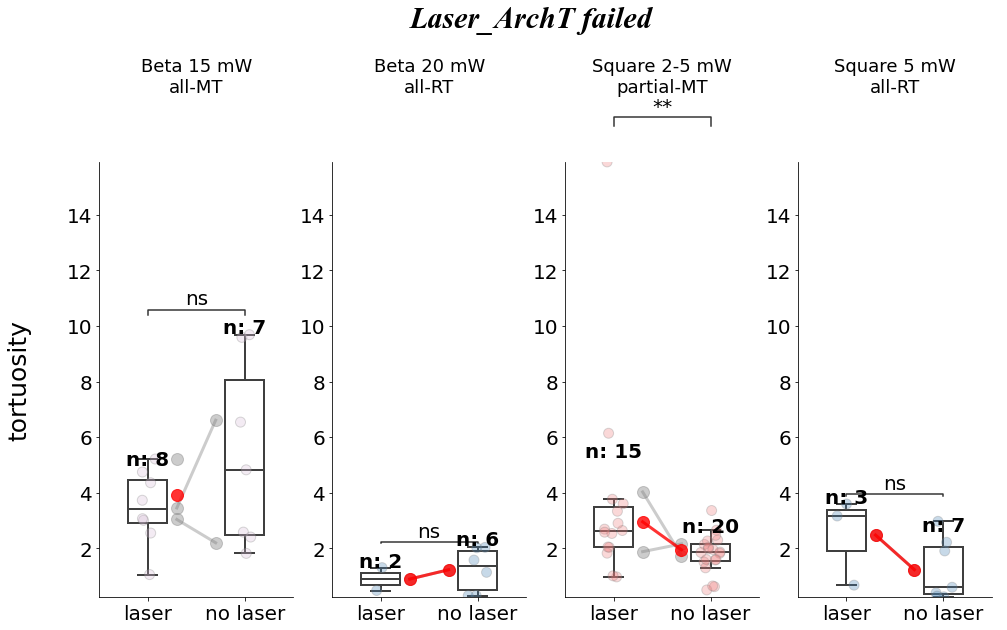

In [20]:
df = pd.read_csv(os.path.join(pre_direct, 'opto_exp_all_protocols_and_animals.csv'), delimiter=",")
df['folder'] = df['pulse'] + df['intensity'] + df['protocol']

column = 'folder'
y = 'tortuosity'
# y = 'RT(ms)'
# y = 'MT(ms)'
# y = 'v_max(cm/s)'
exp_par = 'Laser_ArchT'
# exp_par = 'Laser_ChR2'
# trial = 'successful'
trial = 'failed'

df_plot = df[(df['opto_par'] == exp_par) & (df['trial'] == trial)]

protocol_palete_dict = {'all-RT':['steelblue','lightskyblue'], 'all-MT':['indigo','thistle'],
                       'partial-MT':['lightcoral','peachpuff']}
protocol_color_dict = {'all-RT':'steelblue', 'all-MT':'thistle',
                       'partial-MT':'lightcoral'}
def sns_box_point_plot(df,y,column,exp_par,trial):
    n_subplots = len(np.unique(df['folder']))
    y_max = max(df[y]) ; y_min = min(df[y])
    fig, axes = plt.subplots(nrows=1, ncols=n_subplots, figsize=(4*n_subplots, 8))
    folders = np.unique(df['folder'])
    for count in range(1,len(np.unique(df['folder']))+1):
        folder = folders[count-1]
        result = df[df['folder'] == folder]
        ax = axes[count-1] 
        ax = plt.subplot(100+n_subplots*10+count)
        set_ticks(ax)
        protocol = result['protocol'].values[0]
        trial = result['trial'].values[0]


        sns.stripplot(x="laser", y=y, order=["laser", "no laser"], data=result,jitter=True, edgecolor='grey',
                            linewidth=1,marker='o', size = 10,alpha=0.3 , color=protocol_color_dict[protocol])#color=(.25,.5,.75) )
        g = sns.boxplot(x="laser", y=y, order=["laser", "no laser"],linewidth=2,
                    data=result, fliersize = 0,dodge=False,width = 0.4, boxprops={'facecolor':'None'})
        add_stat_annotation(g, data=result,x="laser", y=y, order=["laser", "no laser"],
                    box_pairs=[("laser", "no laser")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2,fontsize = 20)

        medians = result.groupby(['laser'])[y].quantile(.9)
        nobs =  result.groupby(['laser']).apply(lambda x: 'n: {}'.format(len(x)))
        for tick, label in enumerate(ax.get_xticklabels()):
            ax_laser = label.get_text()
            x_offset = tick
            med_val = medians[ ax_laser]
            num = nobs[ax_laser]

            ax.text(tick, med_val + 0.1, num,
                        horizontalalignment='center', size=20, color='k', weight='semibold')
        rat_key = np.unique(result['rat_no'])
        grouped_ave_var =  group_and_av_animals(result,y)
        x = [0.3,0.7]
        for i in range(grouped_ave_var.shape[0]):
            plt.plot(x,grouped_ave_var[i],'-o',lw = 3, c= 'grey',alpha = 0.4,markersize = 12)
        plt.plot(x,np.average(grouped_ave_var,axis = 0),'-o',lw = 3, c= 'r',alpha = 0.8,markersize = 12)
        plt.ylim(y_min,y_max)
        # get legend information from the plot object
        # handles, labels = ax.get_legend_handles_labels()
        # specify just one legend
        # plt.legend(handles[0:2], labels[0:2], fontsize = 20)
        plt.ylabel('').set_fontproperties(font_label)
        plt.xlabel('').set_fontproperties(font_label)
        plt.title(result['pulse'].values[0]+' '+ result['intensity'].values[0]+' mW' +
                  '\n'+ result['protocol'].values[0],fontsize = 18,pad=70)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
#     y_title_pos = ax.get_position().get_points()+0.2
    fig.suptitle(exp_par+' ' + trial,y=1.15, fontproperties=font)
    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axis
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.ylabel(y,fontsize = 25,labelpad=45)
    if '/' in y : y = y.replace('/', '_')
    plt.savefig(os.path.join( pre_direct, 'Subplots',  y+'_'+trial+'_Rat_'+folder+'_'+exp_par+
                         '.png'),bbox_inches='tight',orientation='landscape',dpi=200)
    
sns_box_point_plot(df_plot,y,column,exp_par,trial)

# check session

In [3]:
rat_no = 1
n_session = 0
# folder = "Square_2-5_mW_partial-MT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Square_5_mW_all-RT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_20_mW_all-RT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_15_mW_all-MT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
folder = "Beta_10_mW_all-RT_Nf_375" ; exp_par = 'Laser_ChR2' ; frame_height = 400
# folder = "Square_5_mW_partial-MT_Nf_500" ; exp_par = 'Laser_ChR2' ; frame_height = 300


# files_list_DLC, files_list_LED, path, body_part, cfg = set_conf_and_df(pre_direct, folder,rat_no,exp_par )
# df, df_LED = get_DLC_LED_df(files_list_DLC, files_list_LED, n_session,cfg)
# session = extract_opto_epochs(df,df_LED,path,folder,body_part,cfg)
# laser = Laser(session)
# failed = Failed(laser)
# successful = Successful(laser)
# non_laser = Non_Laser(session)

cfg_sample,files_list_DLC, files_list_LED = find_all_files_same_protocol(os.path.join(pre_direct,exp_par), folder)
where_plot= 0
body_part = cfg_sample['body_part_list'][where_plot]
all_sessions = extract_epochs_over_sessions(files_list_DLC,files_list_LED,folder,body_part, cfg_sample)
write_pickle(os.path.join(pre_direct,'sessions.pickle'), all_sessions)
unpickled = read_pickle(os.path.join(pre_direct,'sessions.pickle'))
print(unpickled.n_trials)

# laser = Laser(all_sessions)
# laser_failed = Failed(laser)
# laser_successful = Successful(laser)
# # non_laser = Non_Laser(all_sessions)
# # normal_failed = Failed(non_laser)
# # normal_successful = Successful(non_laser)


/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_1/Beta_10_mW_all-RT_Nf_375/Left/Plots  already exists!
/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_21/Beta_10_mW_all-RT_Nf_375/Left/Plots  already exists!
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 4
discarded:  0
n trials =  43
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  1
# second order jitter : 1
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 1
discarded:  1
n trials =  39
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
#

# Laser

## Trajectory successful and failed

/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_1/Beta_10_mW_all-RT_Nf_375/Left/Plots  already exists!
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43
 succeeded =  18 
 failed =  0 
 pad miss detections =  0


No handles with labels found to put in legend.


400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 4
discarded:  0
n trials =  43
 succeeded =  10 
 failed =  2 
 pad miss detections =  0
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  1
# second order jitter : 1
discarded:  1
n trials =  42
 succeeded =  11 
 failed =  1 
 pad miss detections =  0
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 1
discarded:  1
n trials =  39
 succeeded =  13 
 failed =  1 
 pad miss detections =  0


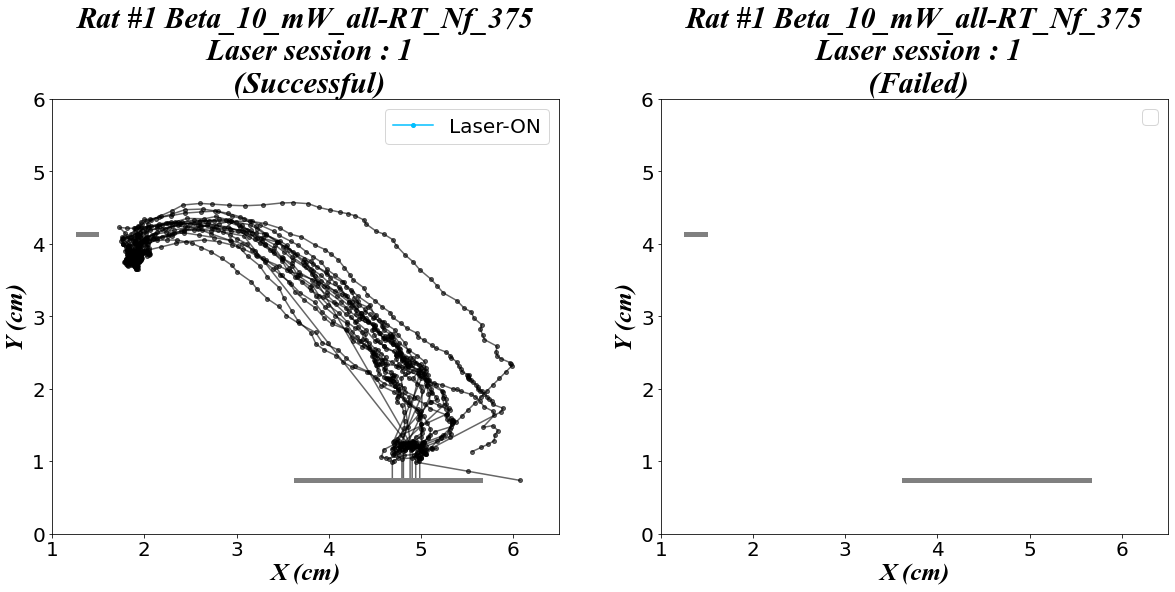

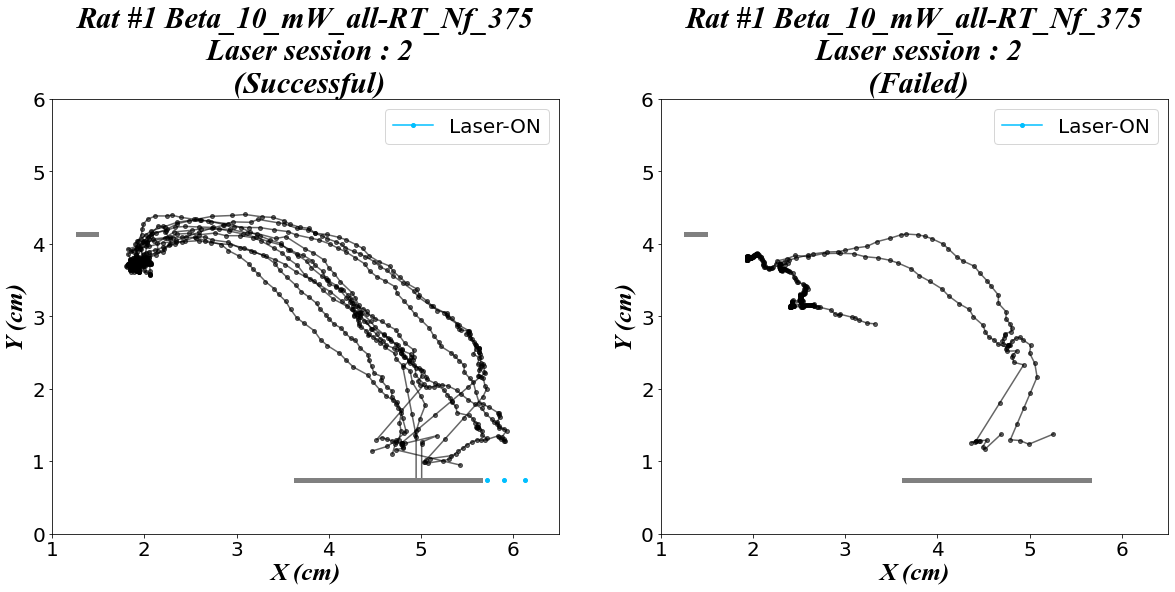

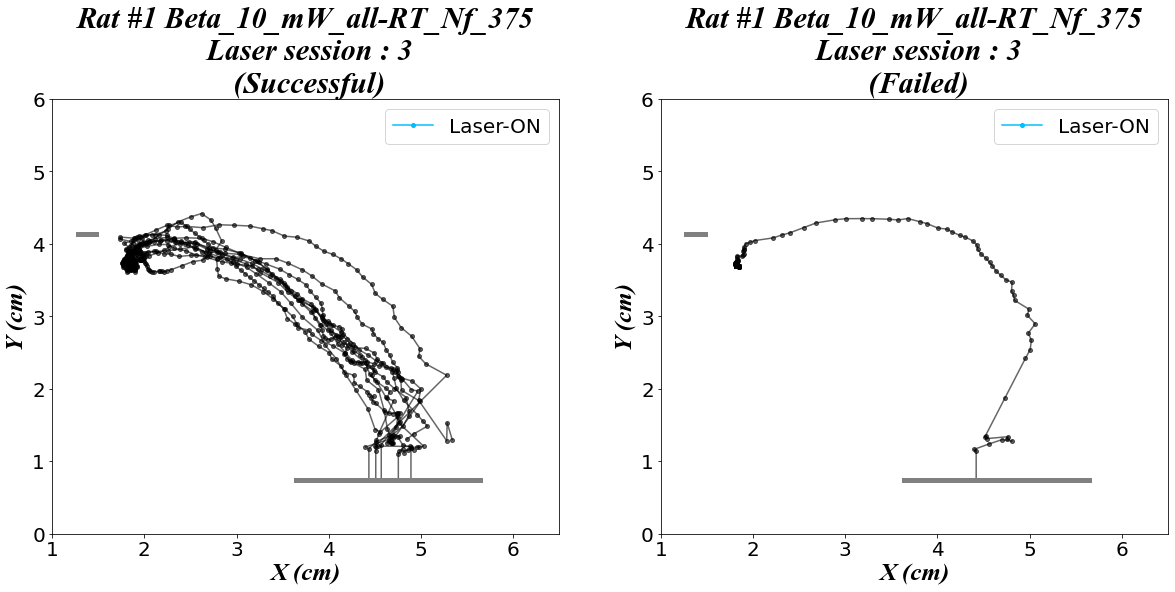

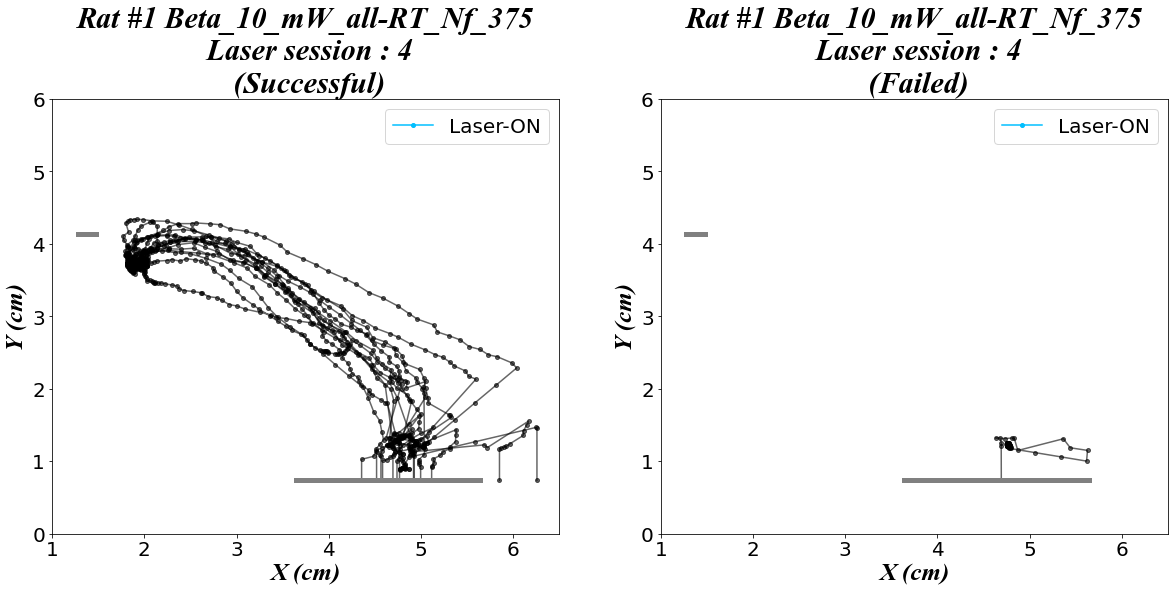

In [3]:
m = 6
rat_no = 1; 
# folder = "Square_2-5_mW_partial-MT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Square_5_mW_all-RT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_20_mW_all-RT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_15_mW_all-MT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
folder = "Beta_10_mW_all-RT_Nf_375" ; exp_par = 'Laser_ChR2' ; frame_height = 400
# folder = "Square_5_mW_partial-MT_Nf_500" ; exp_par = 'Laser_ChR2' ; frame_height = 300
# 

files_list_DLC, files_list_LED, path, body_part, cfg = set_conf_and_df(pre_direct, folder,rat_no,exp_par )

for n in range(0,len(files_list_DLC)):
    plot_laser_trajectory(pre_direct, rat_no, n,files_list_DLC,files_list_LED,path,folder,cfg, font, font_label)


## Velocity

/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ArchT/Rat_2/Square_2-5_mW_partial-MT_Nf_375/Right/Plots  already exists!
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  1
# second order jitter : 0
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 0
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 2
to discard - low likelihoods  4
# second order jitter : 0
discarded:  5
n trials =  38
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  35
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43
x and y must have same first dimension, but hav

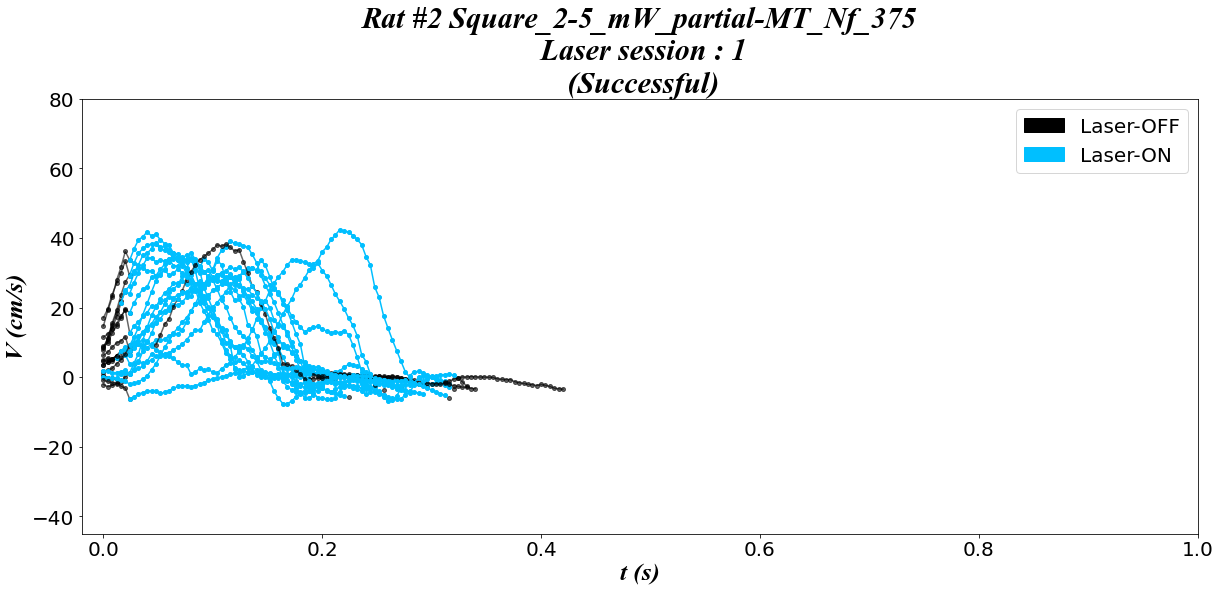

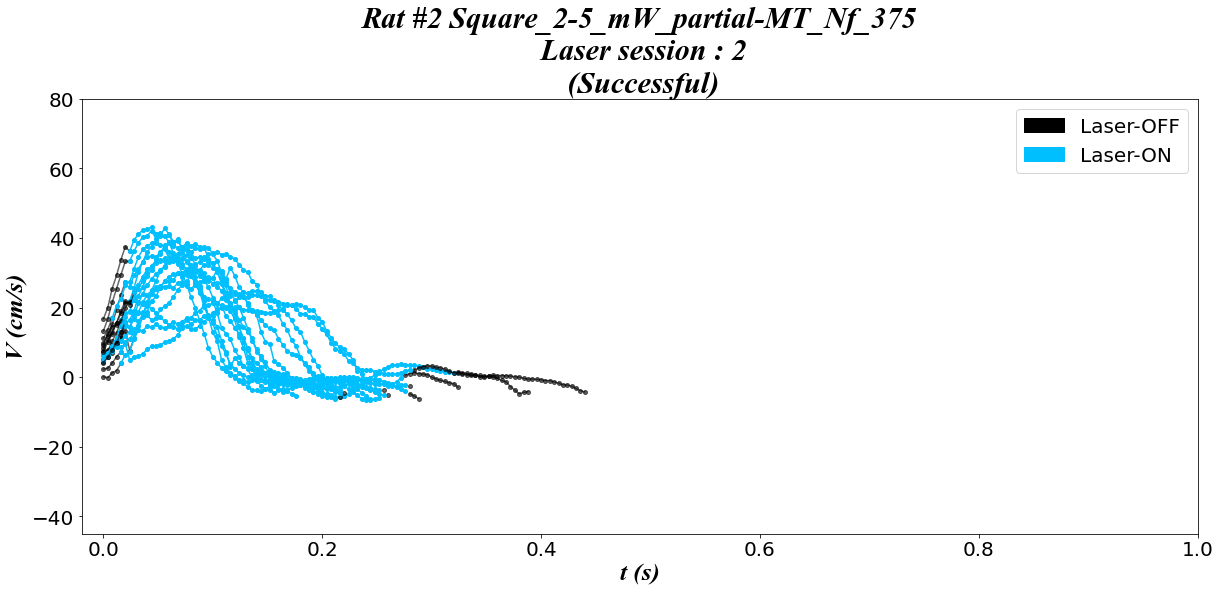

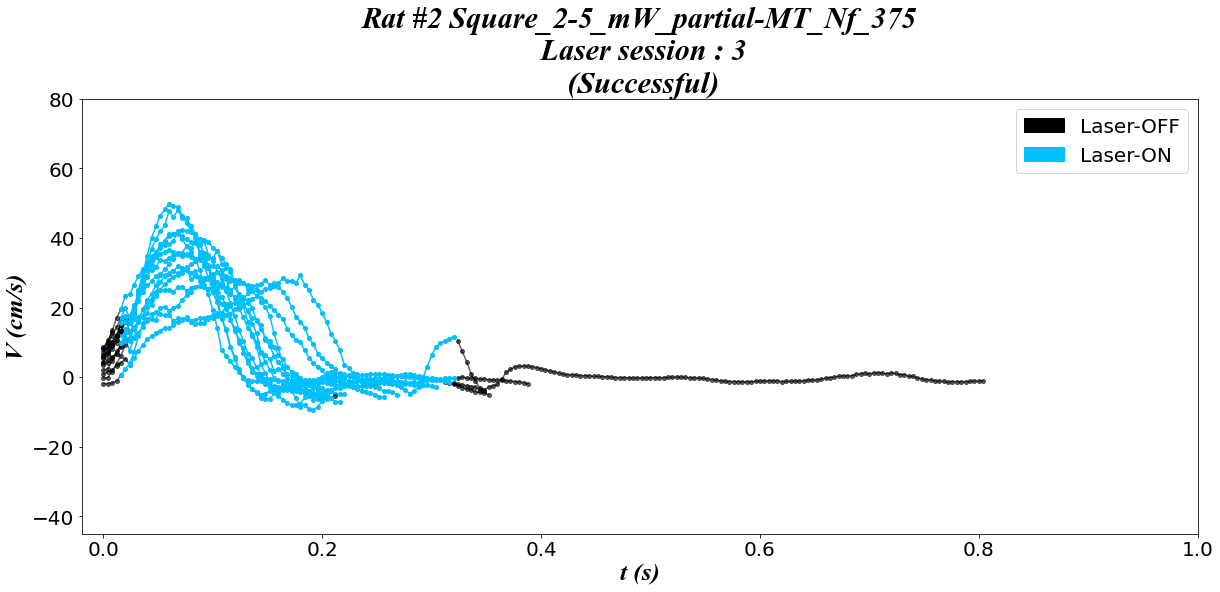

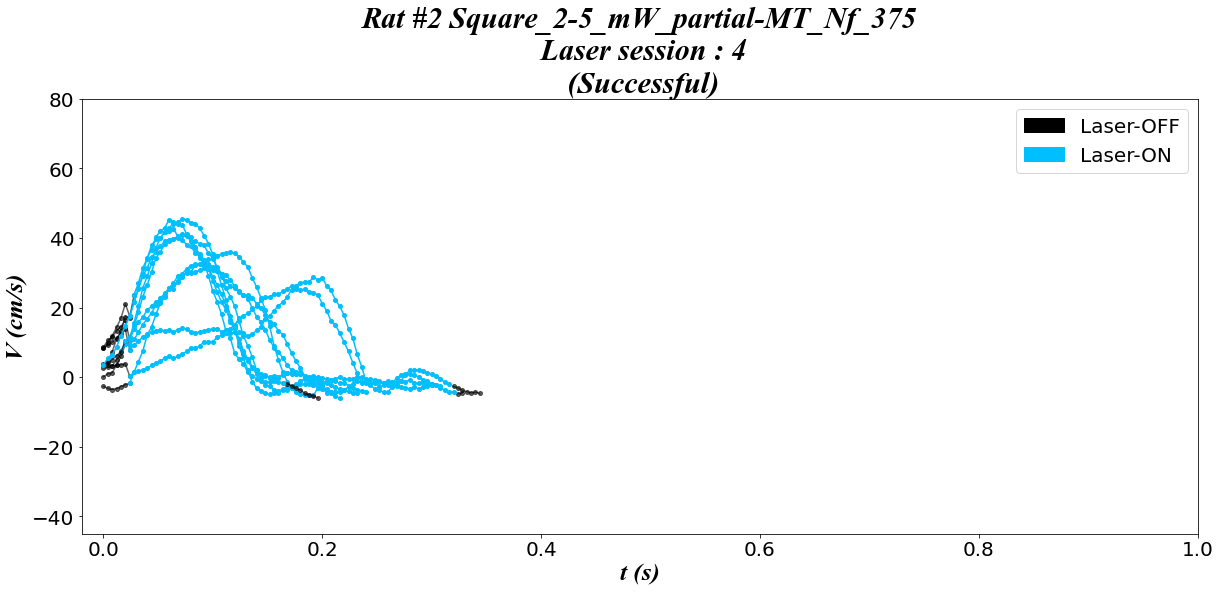

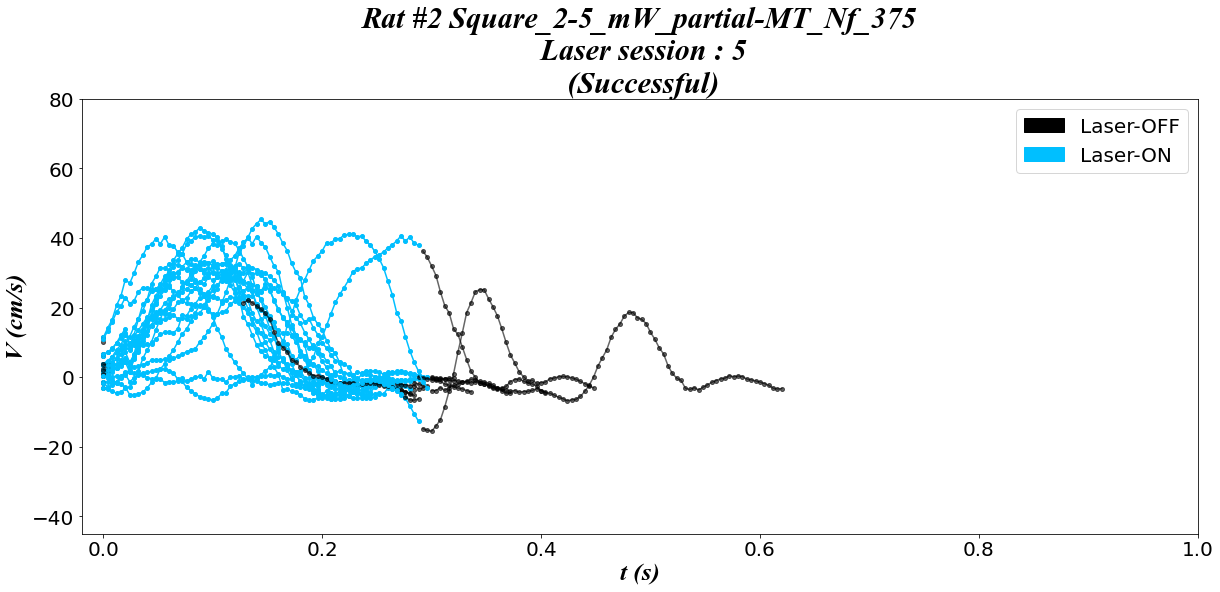

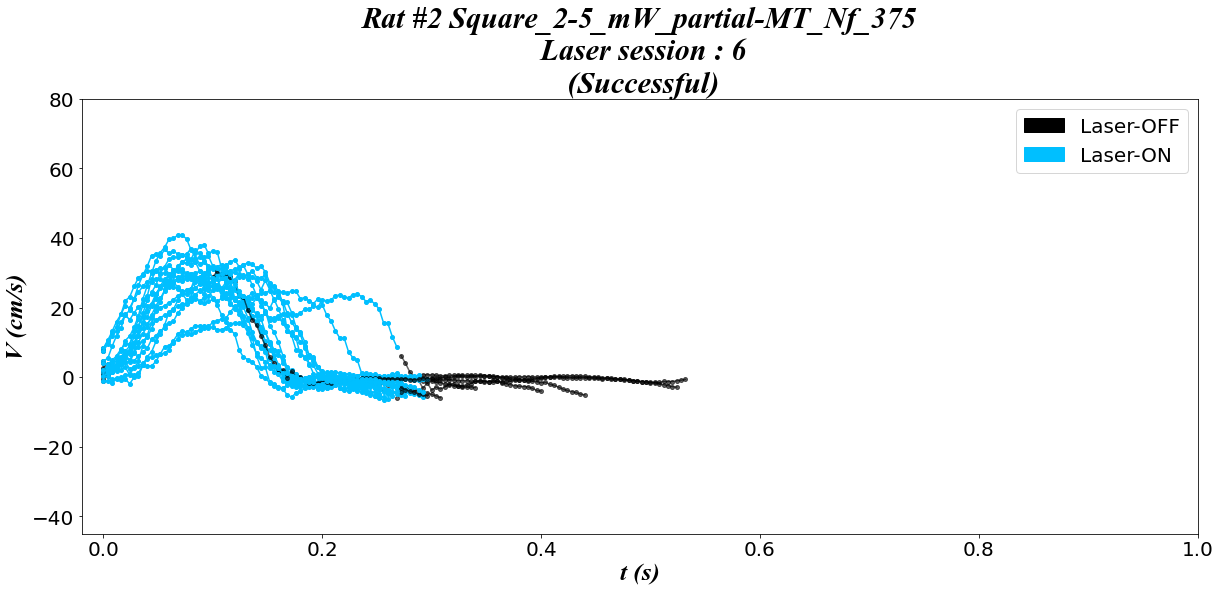

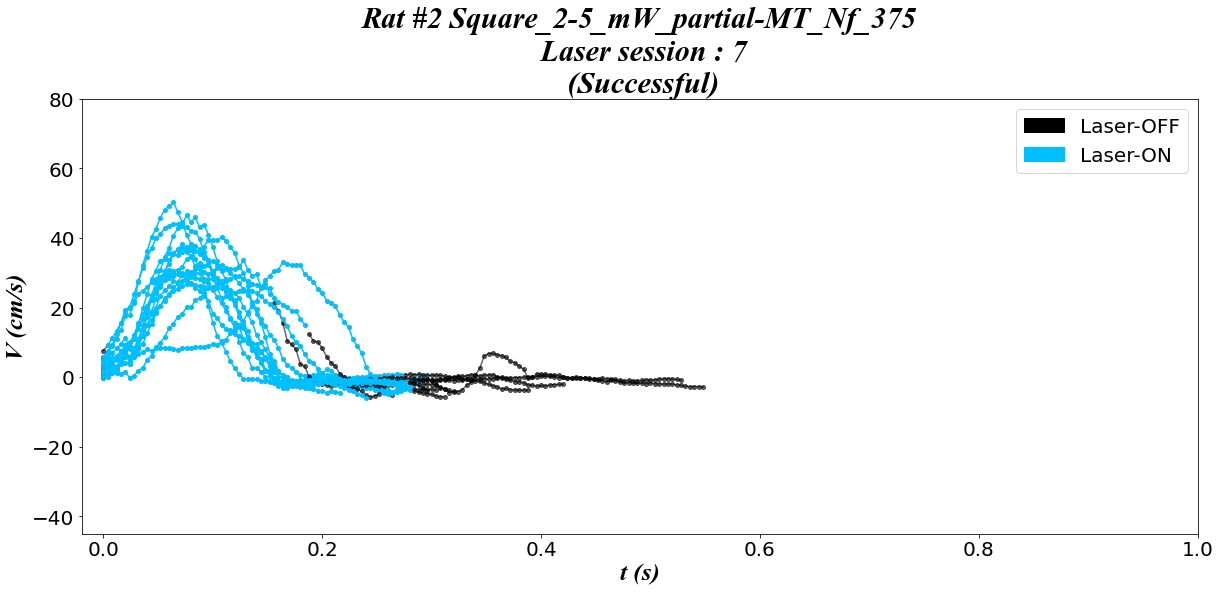

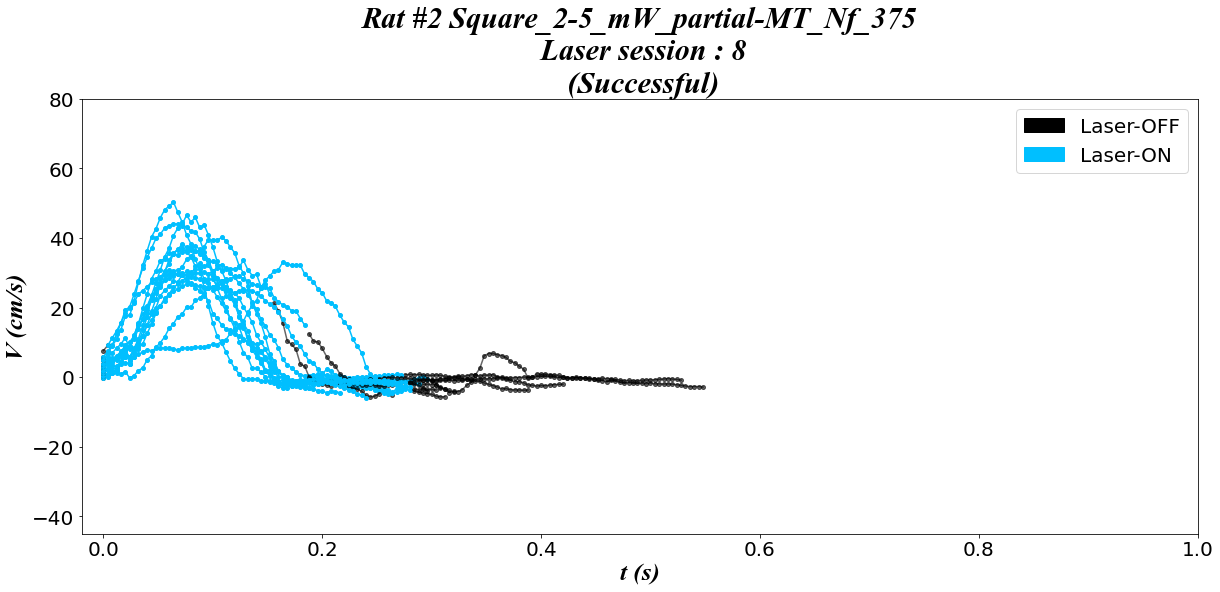

In [4]:
rat_no = 2;
folder = "Square_2-5_mW_partial-MT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Square_5_mW_all-RT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_20_mW_all-RT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_15_mW_all-MT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_10_mW_all-RT_Nf_375" ; exp_par = 'Laser_ChR2' ; frame_height = 400
# folder = "Square_5_mW_partial-MT_Nf_500" ; exp_par = 'Laser_ChR2' ; frame_height = 300


files_list_DLC, files_list_LED, path, body_part, cfg = set_conf_and_df(pre_direct, folder,rat_no,exp_par )

for n in range(0,len(files_list_DLC)):
    plot_laser_velocity(pre_direct, rat_no, n,files_list_DLC,files_list_LED,path,folder,cfg, font, font_label)




# Non Laser 

## Trajectory

/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_1/Beta_10_mW_all-RT_Nf_375/Left/Plots  already exists!
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43
 succeeded =  25 
 failed =  0 
 pad miss detections =  0


<Figure size 432x288 with 0 Axes>

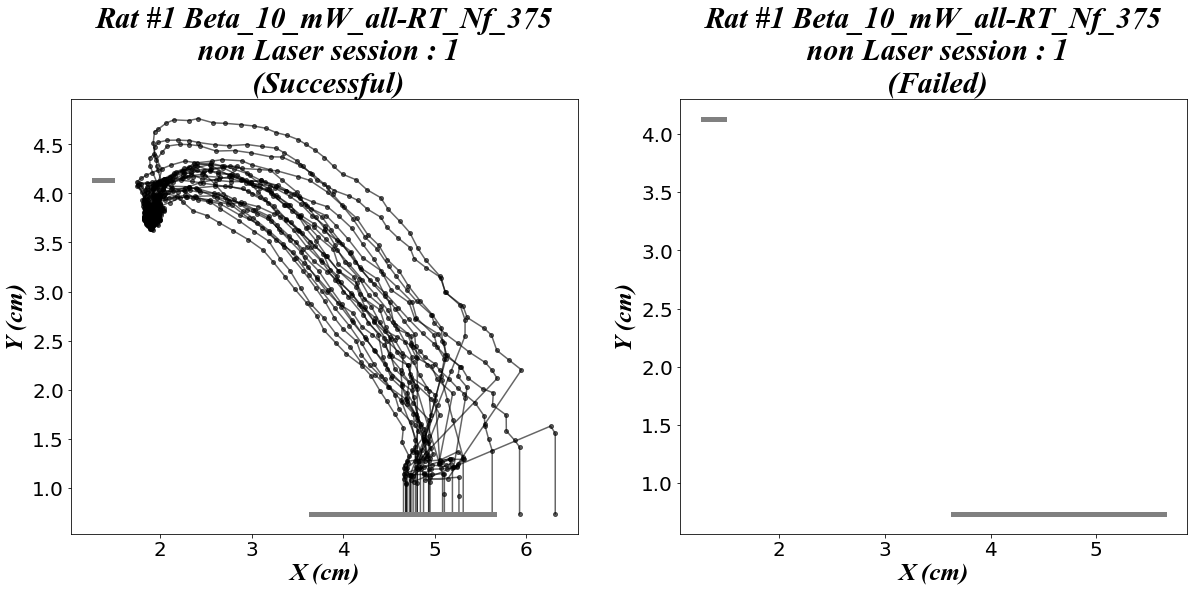

In [2]:
rat_no = 1
# folder = "Square_2-5_mW_partial-MT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Square_5_mW_all-RT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_20_mW_all-RT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_15_mW_all-MT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
folder = "Beta_10_mW_all-RT_Nf_375" ; exp_par = 'Laser_ChR2' ; frame_height = 400
# folder = "Square_5_mW_partial-MT_Nf_500" ; exp_par = 'Laser_ChR2' ; frame_height = 300


files_list_DLC, files_list_LED, path, body_part, cfg = set_conf_and_df(pre_direct, folder,rat_no,exp_par )
for n in range(0,1):#len(files_list_DLC)):
    plot_non_laser_trajectory(pre_direct, rat_no, n,files_list_DLC,files_list_LED,path,folder,cfg, font, font_label)


## Velocity

/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_102/Square_5_mW_partial-MT_Nf_500/Right/Plots  already exists!
400
to discard - pad misdetection 0
to discard - no solid detection above pad 3
to discard - low likelihoods  0
# second order jitter : 1
discarded:  3
n trials =  29


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

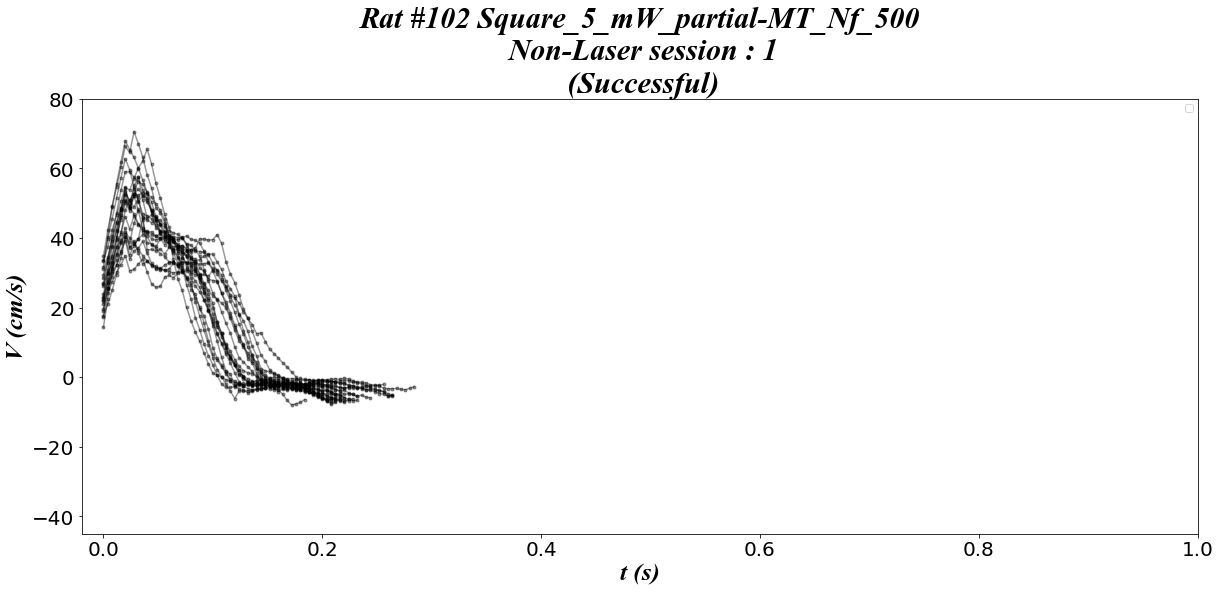

In [2]:
rat_no = 102;
# folder = "Square_2-5_mW_partial-MT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Square_5_mW_all-RT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_20_mW_all-RT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_15_mW_all-MT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_10_mW_all-RT_Nf_375" ; exp_par = 'Laser_ChR2' ; frame_height = 400
folder = "Square_5_mW_partial-MT_Nf_500" ; exp_par = 'Laser_ChR2' ; frame_height = 300


files_list_DLC, files_list_LED, path, body_part, cfg = set_conf_and_df(pre_direct, folder,rat_no,exp_par )
for n in range(0,len(files_list_DLC)):
    plot_non_laser_velocity(pre_direct, rat_no, n,files_list_DLC,files_list_LED,path,folder,cfg, font, font_label)



# Compare $Traveled\: distance$ laser vs. non laser

## Successful + Failed

/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_1/Beta_10_mW_all-RT_Nf_375/Left/Plots  already exists!
/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_21/Beta_10_mW_all-RT_Nf_375/Left/Plots  already exists!
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0


/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:886: RuntimeWarning: invalid value encountered in multiply
  self.epochs_x = np.empty((estimated_n_trials, fp_trial)) * np.nan
/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:887: RuntimeWarning: invalid value encountered in multiply
  self.epochs_y = np.empty((estimated_n_trials, fp_trial)) * np.nan
/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:888: RuntimeWarning: invalid value encountered in multiply
  self.likelihood = np.empty((estimated_n_trials, fp_trial)) * np.nan
/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:889: RuntimeWarning: invalid value encountered in multiply
  self.velocity_r = np.empty((estimated_n_trials, fp_trial)) * np.nan
/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:890: RuntimeWarning: invalid value encountered in multiply
  self.steps = np.empty((estimated_n_trials, fp_trial)) * np.nan
/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:909: RuntimeWarning: invalid value

discarded:  0
n trials =  43
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 4
discarded:  0
n trials =  43
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  1
# second order jitter : 1
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 1
discarded:  1
n trials =  39
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 0
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 2
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 

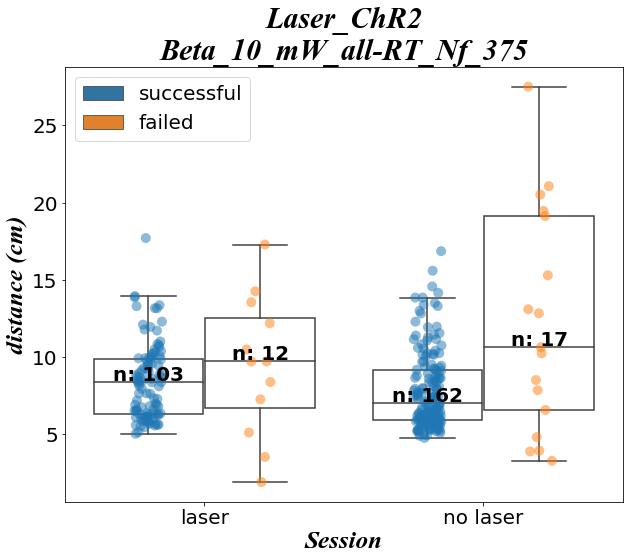

In [8]:
# folder = "Square_2-5_mW_partial-MT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Square_5_mW_all-RT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_20_mW_all-RT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_15_mW_all-MT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
folder = "Beta_10_mW_all-RT_Nf_375" ; exp_par = 'Laser_ChR2' ; frame_height = 400
# folder = "Square_5_mW_partial-MT_Nf_500" ; exp_par = 'Laser_ChR2' ; frame_height = 300


result = build_sessions_transf_to_df(pre_direct, folder,exp_par)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
set_ticks(ax)
ax = sns.stripplot(x="laser", y="distance(cm)", order=["laser", "no laser"],hue="trial",dodge=True, data=result,jitter=True, 
                   marker='o', size = 10,
                   alpha=0.5)
ax = sns.boxplot(x="laser", y="distance(cm)", order=["laser", "no laser"],hue="trial",dodge=True, 
            data=result, boxprops={'facecolor':'None'}, fliersize = 0)

medians = result.groupby(['laser','trial'])['distance(cm)'].median()
nobs =  result.groupby(['laser','trial']).apply(lambda x: 'n: {}'.format(len(x)))
for tick, label in enumerate(ax.get_xticklabels()):
    ax_laser = label.get_text()
    for j, ax_trial in enumerate(ax.get_legend_handles_labels()[1][:2]):
        x_offset = (j - 0.5) * 2/5
        med_val = medians[ ax_laser, ax_trial]
        num = nobs[ax_laser, ax_trial]
        
        ax.text(tick + x_offset, med_val + 0.1, num,
                horizontalalignment='center', size=20, color='k', weight='semibold')
# get legend information from the plot object
handles, labels = ax.get_legend_handles_labels()
# specify just one legend
plt.legend(handles[0:2], labels[0:2], fontsize = 20)
plt.ylabel('distance (cm)').set_fontproperties(font_label)
plt.xlabel('Session').set_fontproperties(font_label)

plt.title(exp_par+'\n'+folder).set_fontproperties(font)
plt.savefig(os.path.join(pre_direct, 'Subplots','Distance_Rat_'+folder+'_'+exp_par+
                     '.png'),bbox_inches='tight',orientation='landscape',dpi=200)


## Only Successful

/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_102/Square_5_mW_partial-MT_Nf_500/Right/Plots  already exists!
400
to discard - pad misdetection 0
to discard - no solid detection above pad 3
to discard - low likelihoods  0
# second order jitter : 1
discarded:  3
n trials =  29
laser success trials =  8
laser failed trials =  0
normal success trials =  21
normal failed trials =  0


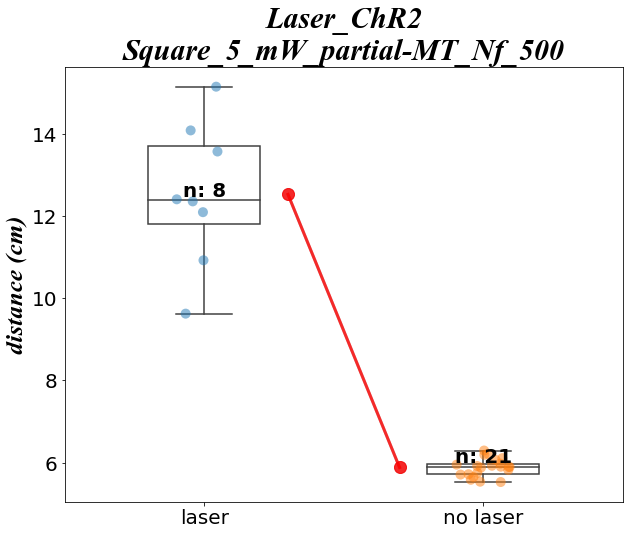

In [9]:
# folder = "Square_2-5_mW_partial-MT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Square_5_mW_all-RT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_20_mW_all-RT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_15_mW_all-MT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_10_mW_all-RT_Nf_375" ; exp_par = 'Laser_ChR2' ; frame_height = 400
folder = "Square_5_mW_partial-MT_Nf_500" ; exp_par = 'Laser_ChR2' ; frame_height = 300



df = build_sessions_transf_to_df(pre_direct, folder,exp_par)
result = df[df['trial'] == 'successful']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

set_ticks(ax)
ax = sns.stripplot(x="laser", y="distance(cm)", order=["laser", "no laser"],dodge=True, data=result,jitter=True, 
                   marker='o', size = 10,
                   alpha=0.5)
ax = sns.boxplot(x="laser", y="distance(cm)", order=["laser", "no laser"],dodge=False, width = 0.4 ,
            data=result, boxprops={'facecolor':'None'}, fliersize = 0)

medians = result.groupby(['laser'])['distance(cm)'].median()
nobs =  result.groupby(['laser']).apply(lambda x: 'n: {}'.format(len(x)))
for tick, label in enumerate(ax.get_xticklabels()):
    ax_laser = label.get_text()
    x_offset = tick
    med_val = medians[ ax_laser]
    num = nobs[ax_laser]
        
    ax.text(tick, med_val + 0.1, num,
                horizontalalignment='center', size=20, color='k', weight='semibold')
    
grouped_ave_var = group_and_av_animals(result,y = 'distance(cm)')
x = np.unique(result['laser'])
x = [0.3,0.7]
for i in range(grouped_ave_var.shape[0]):
    plt.plot(x,grouped_ave_var[i],'-o',lw = 3, c= 'grey',alpha = 0.4,markersize = 12)
plt.plot(x,np.average(grouped_ave_var,axis = 0),'-o',lw = 3, c= 'r',alpha = 0.8,markersize = 12)

# get legend information from the plot object
# handles, labels = ax.get_legend_handles_labels()
# specify just one legend
# plt.legend(handles[0:2], labels[0:2], fontsize = 20)
plt.ylabel('distance (cm)').set_fontproperties(font_label)
plt.xlabel('').set_fontproperties(font_label)

plt.title(exp_par+'\n'+folder).set_fontproperties(font)
plt.savefig(os.path.join(pre_direct,'Subplots','Distance_Rat_'+folder+'_'+exp_par+
                     '.png'),bbox_inches='tight',orientation='landscape',dpi=200)


# Compare $MT$ laser vs. non laser

## Only successful

/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_102/Square_5_mW_partial-MT_Nf_500/Right/Plots  already exists!
400
to discard - pad misdetection 0
to discard - no solid detection above pad 3
to discard - low likelihoods  0
# second order jitter : 1
discarded:  3
n trials =  29
laser success trials =  8
laser failed trials =  0
normal success trials =  21
normal failed trials =  0


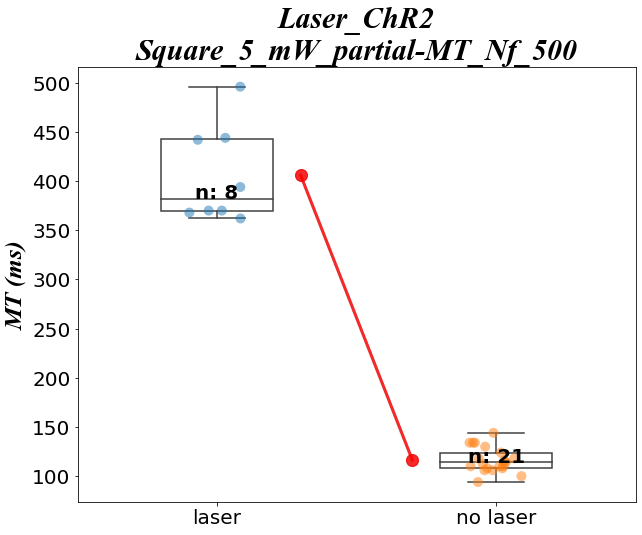

In [10]:
# folder = "Square_2-5_mW_partial-MT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Square_5_mW_all-RT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_20_mW_all-RT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_15_mW_all-MT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_10_mW_all-RT_Nf_375" ; exp_par = 'Laser_ChR2' ; frame_height = 400
folder = "Square_5_mW_partial-MT_Nf_500" ; exp_par = 'Laser_ChR2' ; frame_height = 300


result = build_sessions_transf_to_df(pre_direct, folder,exp_par)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
set_ticks(ax)
ax = sns.stripplot(x="laser", y="MT(ms)", order=["laser", "no laser"], data=result,jitter=True, 
                   marker='o', size = 10,
                   alpha=0.5)
ax = sns.boxplot(x="laser", y="MT(ms)", order=["laser", "no laser"], 
            data=result, boxprops={'facecolor':'None'}, fliersize = 0, dodge=False, width = 0.4)

medians = result.groupby(['laser'])['MT(ms)'].median()
nobs =  result.groupby(['laser']).apply(lambda x: 'n: {}'.format(len(x)))
for tick, label in enumerate(ax.get_xticklabels()):
    ax_laser = label.get_text()
    x_offset = tick
    med_val = medians[ ax_laser]
    num = nobs[ax_laser]
        
    ax.text(tick, med_val + 0.1, num,
                horizontalalignment='center', size=20, color='k', weight='semibold')
    
grouped_ave_var = grouped_ave_var = group_and_av_animals(result,y = 'MT(ms)')
x = np.unique(result['laser'])
x = [0.3,0.7]
for i in range(grouped_ave_var.shape[0]):
    plt.plot(x,grouped_ave_var[i],'-o',lw = 3, c= 'grey',alpha = 0.4,markersize = 12)
plt.plot(x,np.average(grouped_ave_var,axis = 0),'-o',lw = 3, c= 'r',alpha = 0.8,markersize = 12)

# get legend information from the plot object
# handles, labels = ax.get_legend_handles_labels()
# specify just one legend
# plt.legend(handles[0:2], labels[0:2], fontsize = 20)
plt.ylabel('MT (ms)').set_fontproperties(font_label)
plt.xlabel('').set_fontproperties(font_label)

plt.title(exp_par+'\n'+folder).set_fontproperties(font)
plt.savefig(os.path.join(pre_direct,'Subplots','MT_Rat_'+folder+'_'+exp_par+
                     '.png'),bbox_inches='tight',orientation='landscape',dpi=200)

# Compare $RT$ laser vs. non laser

## Successful + Failed

/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_1/Beta_10_mW_all-RT_Nf_375/Left/Plots  already exists!
/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_21/Beta_10_mW_all-RT_Nf_375/Left/Plots  already exists!
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43


/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:887: RuntimeWarning: invalid value encountered in multiply
  self.epochs_y = np.empty((estimated_n_trials, fp_trial)) * np.nan
/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:888: RuntimeWarning: invalid value encountered in multiply
  self.likelihood = np.empty((estimated_n_trials, fp_trial)) * np.nan


400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 4
discarded:  0
n trials =  43
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  1
# second order jitter : 1
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 1
discarded:  1
n trials =  39
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 0
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 2
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 1
discarded:  0
n trials =  4

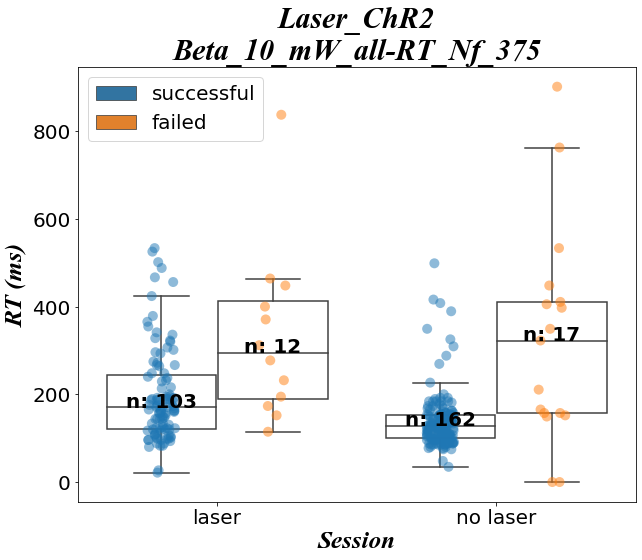

In [11]:
# folder = "Square_2-5_mW_partial-MT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Square_5_mW_all-RT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_20_mW_all-RT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_15_mW_all-MT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
folder = "Beta_10_mW_all-RT_Nf_375" ; exp_par = 'Laser_ChR2' ; frame_height = 400
# folder = "Square_5_mW_partial-MT_Nf_500" ; exp_par = 'Laser_ChR2' ; frame_height = 300


result = build_sessions_transf_to_df(pre_direct, folder,exp_par)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

set_ticks(ax)
ax = sns.stripplot(x="laser", y="RT(ms)", order=["laser", "no laser"],hue="trial",dodge=True, data=result,jitter=True, 
                   marker='o', size = 10,
                   alpha=0.5)
ax = sns.boxplot(x="laser", y="RT(ms)", order=["laser", "no laser"],hue="trial",dodge=True, 
            data=result, boxprops={'facecolor':'None'}, fliersize = 0)

medians = result.groupby(['laser','trial'])['RT(ms)'].median()
nobs =  result.groupby(['laser','trial']).apply(lambda x: 'n: {}'.format(len(x)))
for tick, label in enumerate(ax.get_xticklabels()):
    ax_laser = label.get_text()
    for j, ax_trial in enumerate(ax.get_legend_handles_labels()[1][:2]):
        x_offset = (j - 0.5) * 2/5
        med_val = medians[ ax_laser, ax_trial]
        num = nobs[ax_laser, ax_trial]
        
        ax.text(tick + x_offset, med_val + 0.1, num,
                horizontalalignment='center', size=20, color='k', weight='semibold')
# get legend information from the plot object
handles, labels = ax.get_legend_handles_labels()
# specify just one legend
plt.legend(handles[0:2], labels[0:2], fontsize = 20)
plt.ylabel('RT (ms)').set_fontproperties(font_label)
plt.xlabel('Session').set_fontproperties(font_label)

plt.title(exp_par+'\n'+folder).set_fontproperties(font)
plt.savefig(os.path.join(pre_direct,'Subplots','RT_Rat_'+folder+'_'+exp_par+
                     '.png'),bbox_inches='tight',orientation='landscape',dpi=200)

## Only Successful

/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_102/Square_5_mW_partial-MT_Nf_500/Right/Plots  already exists!
400
to discard - pad misdetection 0
to discard - no solid detection above pad 3
to discard - low likelihoods  0
# second order jitter : 1
discarded:  3
n trials =  29
laser success trials =  8
laser failed trials =  0
normal success trials =  21
normal failed trials =  0


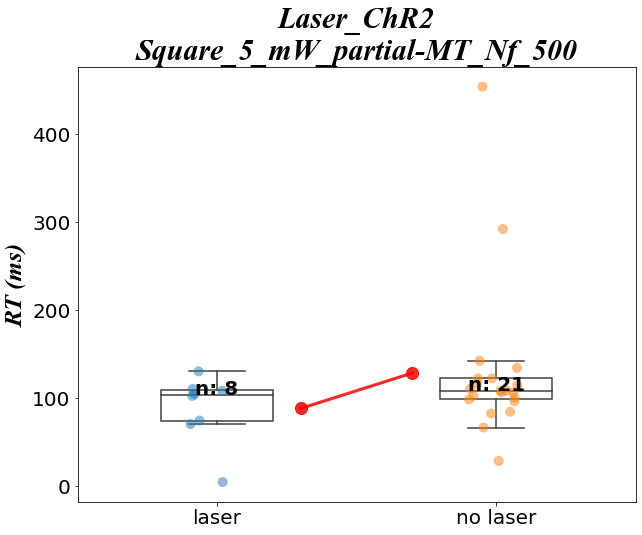

In [12]:
# folder = "Square_2-5_mW_partial-MT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Square_5_mW_all-RT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_20_mW_all-RT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_15_mW_all-MT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_10_mW_all-RT_Nf_375" ; exp_par = 'Laser_ChR2' ; frame_height = 400
folder = "Square_5_mW_partial-MT_Nf_500" ; exp_par = 'Laser_ChR2' ; frame_height = 300


result = build_sessions_transf_to_df(pre_direct, folder,exp_par)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
set_ticks(ax)
ax = sns.stripplot(x="laser", y="RT(ms)", order=["laser", "no laser"],dodge=True, data=result,jitter=True, 
                   marker='o', size = 10,
                   alpha=0.5)
ax = sns.boxplot(x="laser", y="RT(ms)", order=["laser", "no laser"],dodge=False, width = 0.4, 
            data=result, boxprops={'facecolor':'None'}, fliersize = 0)

medians = result.groupby(['laser'])['RT(ms)'].median()
nobs =  result.groupby(['laser']).apply(lambda x: 'n: {}'.format(len(x)))
for tick, label in enumerate(ax.get_xticklabels()):
    ax_laser = label.get_text()
    x_offset = tick
    med_val = medians[ ax_laser]
    num = nobs[ax_laser]
        
    ax.text(tick, med_val + 0.1, num,
                horizontalalignment='center', size=20, color='k', weight='semibold')
    
grouped_ave_var = group_and_av_animals(result,y = 'RT(ms)')
x = np.unique(result['laser'])
x = [0.3,0.7]
for i in range(grouped_ave_var.shape[0]):
    plt.plot(x,grouped_ave_var[i],'-o',lw = 3, c= 'grey',alpha = 0.4,markersize = 12)
plt.plot(x,np.average(grouped_ave_var,axis = 0),'-o',lw = 3, c= 'r',alpha = 0.8,markersize = 12)

# get legend information from the plot object
# handles, labels = ax.get_legend_handles_labels()
# specify just one legend
# plt.legend(handles[0:2], labels[0:2], fontsize = 20)
plt.ylabel('RT (ms)').set_fontproperties(font_label)
plt.xlabel('').set_fontproperties(font_label)

plt.title(exp_par+'\n'+folder).set_fontproperties(font)
plt.savefig(os.path.join(pre_direct,'Subplots','RT_Rat_'+folder+'_'+exp_par+
                     '.png'),bbox_inches='tight',orientation='landscape',dpi=200)
    

## all sessions one rat

/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ArchT/Rat_3/Beta_15_mW_all-MT_Nf_500/Left/Plots  already exists!
/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ArchT/Rat_2/Beta_15_mW_all-MT_Nf_500/Right/Plots  already exists!
/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ArchT/Rat_4/Beta_15_mW_all-MT_Nf_500/Right/Plots  already exists!
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0


/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:886: RuntimeWarning: invalid value encountered in multiply
  self.epochs_x = np.empty((estimated_n_trials, fp_trial)) * np.nan


discarded:  0
n trials =  32
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  32
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  32
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  32
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  5
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  32
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 1

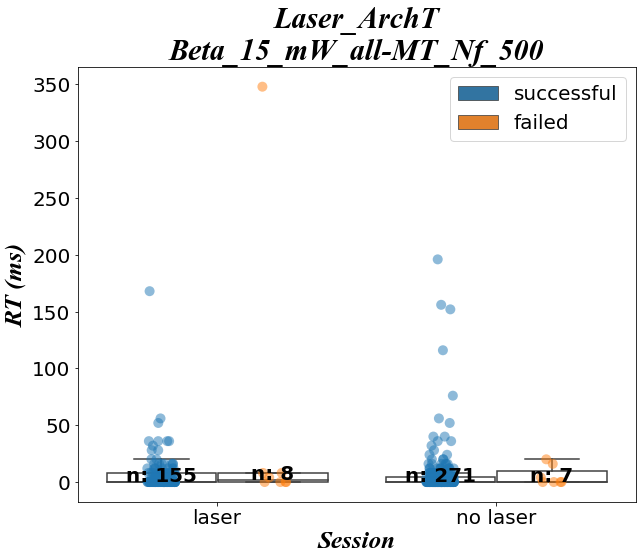

In [13]:
rat_no = 2; 

# folder = "Square_2-5_mW_partial-MT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Square_5_mW_all-RT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_20_mW_all-RT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
folder = "Beta_15_mW_all-MT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_10_mW_all-RT_Nf_375" ; exp_par = 'Laser_ChR2' ; frame_height = 400
# folder = "Square_5_mW_partial-MT_Nf_500" ; exp_par = 'Laser_ChR2' ; frame_height = 300


cfg_sample,files_list_DLC, files_list_LED = find_all_files_same_protocol(os.path.join(pre_direct,exp_par), folder)

all_sessions = extract_epochs_over_sessions(files_list_DLC, files_list_LED, folder,body_part,cfg_sample)
laser = Laser(all_sessions)
laser_failed = Failed(laser)
laser_successful = Successful(laser)
print("laser success trials = ",laser_successful.n_trials)
print("laser failed trials = ",laser_failed.n_trials)
non_laser = Non_Laser(all_sessions)
print(non_laser.path.shape)
normal_failed = Failed(non_laser)
normal_successful = Successful(non_laser)
print("normal success trials = ",normal_successful.n_trials)
print("normal failed trials = ",normal_failed.n_trials)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

col_names =  ['RT', 'trial', 'laser']
result = pd.DataFrame(columns = col_names)
df = pd.DataFrame(({'RT':laser_successful.pad_off_t, 'trial':['successful']*len(laser_successful.pad_off_t), 'laser':['laser']*len(laser_successful.pad_off_t)}))
df1 = pd.DataFrame(({'RT':laser_failed.pad_off_t, 'trial':['failed']*len(laser_failed.pad_off_t), 'laser':['laser']*len(laser_failed.pad_off_t)}))
df2 = pd.DataFrame(({'RT':normal_successful.pad_off_t, 'trial':['successful']*len(normal_successful.pad_off_t), 'laser':['no laser']*len(normal_successful.pad_off_t)}))
df3 = pd.DataFrame(({'RT':normal_failed.pad_off_t, 'trial':['failed']*len(normal_failed.pad_off_t), 'laser':['no laser']*len(normal_failed.pad_off_t)}))


result = pd.concat([result, df, df1, df2, df3],ignore_index=True)
result['RT'] = result['RT']*4


set_ticks(ax)
ax = sns.stripplot(x="laser", y="RT", order=["laser", "no laser"],hue="trial",dodge=True, data=result,jitter=True, 
                   marker='o', size = 10,
                   alpha=0.5)
ax = sns.boxplot(x="laser", y="RT", order=["laser", "no laser"],hue="trial",dodge=True, 
            data=result, boxprops={'facecolor':'None'}, fliersize = 0)

medians = result.groupby(['laser','trial'])['RT'].median()
nobs =  result.groupby(['laser','trial']).apply(lambda x: 'n: {}'.format(len(x)))
for tick, label in enumerate(ax.get_xticklabels()):
    ax_laser = label.get_text()
    for j, ax_trial in enumerate(ax.get_legend_handles_labels()[1][:2]):
        x_offset = (j - 0.5) * 2/5
        med_val = medians[ ax_laser, ax_trial]
        num = nobs[ax_laser, ax_trial]
        
        ax.text(tick + x_offset, med_val + 0.1, num,
                horizontalalignment='center', size=20, color='k', weight='semibold')
# get legend information from the plot object
handles, labels = ax.get_legend_handles_labels()
# specify just one legend
plt.legend(handles[0:2], labels[0:2], fontsize = 20)
plt.ylabel('RT (ms)').set_fontproperties(font_label)
plt.xlabel('Session').set_fontproperties(font_label)

plt.title(exp_par+'\n'+folder).set_fontproperties(font)
plt.savefig(os.path.join(pre_direct, 'Subplots', 'RT_Rat_'+folder+'_'+exp_par+
                     '.png'),bbox_inches='tight',orientation='landscape',dpi=200)


# Compare $Tortuosity$ laser vs. non laser

## successfull + Failed

/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_1/Beta_10_mW_all-RT_Nf_375/Left/Plots  already exists!
/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_21/Beta_10_mW_all-RT_Nf_375/Left/Plots  already exists!
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43


/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:887: RuntimeWarning: invalid value encountered in multiply
  self.epochs_y = np.empty((estimated_n_trials, fp_trial)) * np.nan
/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:888: RuntimeWarning: invalid value encountered in multiply
  self.likelihood = np.empty((estimated_n_trials, fp_trial)) * np.nan


400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 4
discarded:  0
n trials =  43
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  1
# second order jitter : 1
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 1
discarded:  1
n trials =  39
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 0
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 2
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 1
discarded:  0
n trials =  4

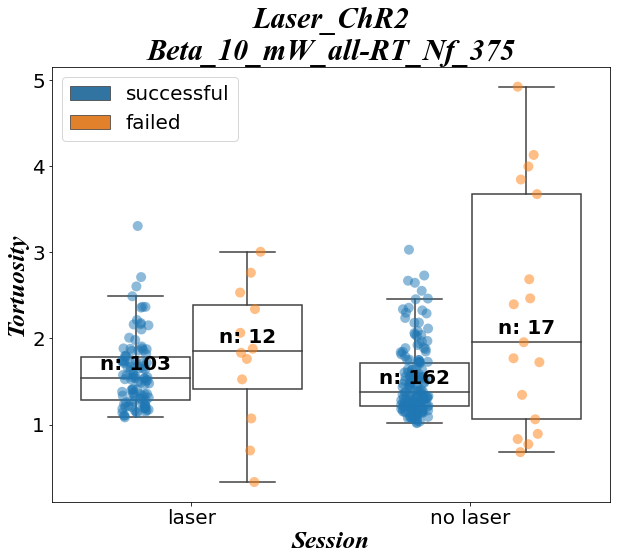

In [14]:
# folder = "Square_2-5_mW_partial-MT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Square_5_mW_all-RT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_20_mW_all-RT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_15_mW_all-MT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
folder = "Beta_10_mW_all-RT_Nf_375" ; exp_par = 'Laser_ChR2' ; frame_height = 400
# folder = "Square_5_mW_partial-MT_Nf_500" ; exp_par = 'Laser_ChR2' ; frame_height = 300

result = build_sessions_transf_to_df(pre_direct, folder,exp_par)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
set_ticks(ax)
ax = sns.stripplot(x="laser", y="tortuosity", order=["laser", "no laser"],hue="trial",dodge=True, data=result,
                   jitter=True,marker='o', size = 10, alpha=0.5)
ax = sns.boxplot(x="laser", y="tortuosity", order=["laser", "no laser"],hue="trial",dodge=True, 
            data=result, boxprops={'facecolor':'None'}, fliersize = 0)

medians = result.groupby(['laser','trial'])['tortuosity'].median()
nobs =  result.groupby(['laser','trial']).apply(lambda x: 'n: {}'.format(len(x)))
for tick, label in enumerate(ax.get_xticklabels()):
    ax_laser = label.get_text()
    for j, ax_trial in enumerate(ax.get_legend_handles_labels()[1][:2]):
        x_offset = (j - 0.5) * 2/5
        med_val = medians[ ax_laser, ax_trial]
        num = nobs[ax_laser, ax_trial]
        
        ax.text(tick + x_offset, med_val + 0.1, num,
                horizontalalignment='center', size=20, color='k', weight='semibold')
# get legend information from the plot object
handles, labels = ax.get_legend_handles_labels()
# specify just one legend
plt.legend(handles[0:2], labels[0:2], fontsize = 20)
plt.ylabel('Tortuosity').set_fontproperties(font_label)
plt.xlabel('Session').set_fontproperties(font_label)

plt.title(exp_par+'\n'+folder).set_fontproperties(font)
plt.savefig(os.path.join(pre_direct, 'Subplots', 'Tortuosity_Rat_'+folder+'_'+exp_par+
                     '.png'),bbox_inches='tight',orientation='landscape',dpi=200)
    

## Only successfull

/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_1/Beta_10_mW_all-RT_Nf_375/Left/Plots  already exists!
/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_21/Beta_10_mW_all-RT_Nf_375/Left/Plots  already exists!
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43


/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:886: RuntimeWarning: invalid value encountered in multiply
  self.epochs_x = np.empty((estimated_n_trials, fp_trial)) * np.nan
/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:887: RuntimeWarning: invalid value encountered in multiply
  self.epochs_y = np.empty((estimated_n_trials, fp_trial)) * np.nan
/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:888: RuntimeWarning: invalid value encountered in multiply
  self.likelihood = np.empty((estimated_n_trials, fp_trial)) * np.nan
/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:889: RuntimeWarning: invalid value encountered in multiply
  self.velocity_r = np.empty((estimated_n_trials, fp_trial)) * np.nan
/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:890: RuntimeWarning: invalid value encountered in multiply
  self.steps = np.empty((estimated_n_trials, fp_trial)) * np.nan
/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:909: RuntimeWarning: invalid value

400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 4
discarded:  0
n trials =  43
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  1
# second order jitter : 1
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 1
discarded:  1
n trials =  39
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 0
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 2
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 1
discarded:  0
n trials =  4

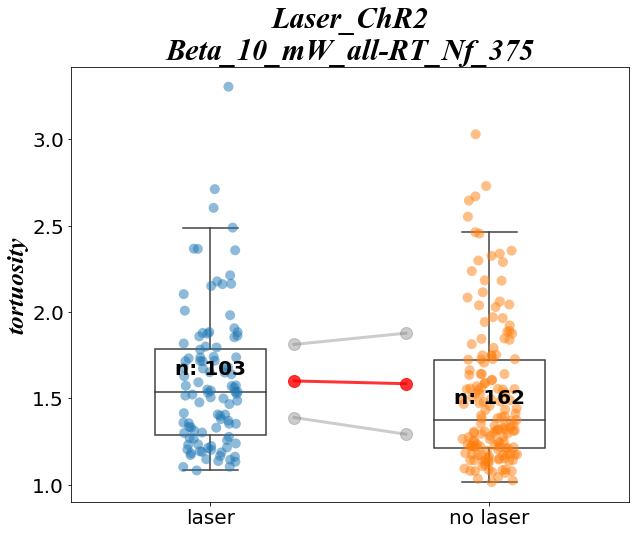

In [15]:
# folder = "Square_2-5_mW_partial-MT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Square_5_mW_all-RT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_20_mW_all-RT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_15_mW_all-MT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
folder = "Beta_10_mW_all-RT_Nf_375" ; exp_par = 'Laser_ChR2' ; frame_height = 400
# folder = "Square_5_mW_partial-MT_Nf_500" ; exp_par = 'Laser_ChR2' ; frame_height = 300

df = build_sessions_transf_to_df(pre_direct, folder,exp_par)
result = df[df['trial'] == 'successful']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
set_ticks(ax)
ax = sns.stripplot(x="laser", y="tortuosity", order=["laser", "no laser"], data=result,jitter=True, 
                   marker='o', size = 10,
                   alpha=0.5)
ax = sns.boxplot(x="laser", y="tortuosity", order=["laser", "no laser"], 
            data=result, boxprops={'facecolor':'None'}, fliersize = 0,dodge=False,width = 0.4)

medians = result.groupby(['laser'])['tortuosity'].median()
nobs =  result.groupby(['laser']).apply(lambda x: 'n: {}'.format(len(x)))
for tick, label in enumerate(ax.get_xticklabels()):
    ax_laser = label.get_text()
    x_offset = tick
    med_val = medians[ ax_laser]
    num = nobs[ax_laser]
        
    ax.text(tick, med_val + 0.1, num,
                horizontalalignment='center', size=20, color='k', weight='semibold')
    
grouped_ave_var = group_and_av_animals(result,y = 'tortuosity')
x = [0.3,0.7]
for i in range(grouped_ave_var.shape[0]):
    plt.plot(x,grouped_ave_var[i],'-o',lw = 3, c= 'grey',alpha = 0.4,markersize = 12)
plt.plot(x,np.average(grouped_ave_var,axis = 0),'-o',lw = 3, c= 'r',alpha = 0.8,markersize = 12)

# get legend information from the plot object
# handles, labels = ax.get_legend_handles_labels()
# specify just one legend
# plt.legend(handles[0:2], labels[0:2], fontsize = 20)
plt.ylabel('tortuosity').set_fontproperties(font_label)
plt.xlabel('').set_fontproperties(font_label)
plt.title(exp_par+'\n'+folder).set_fontproperties(font)
plt.savefig(os.path.join(pre_direct, 'Subplots', 'tortuosity_only_success_Rat_'+folder+'_'+exp_par+
                     '.png'),bbox_inches='tight',orientation='landscape',dpi=200)
    

# Compare $ V_{max}$ laser vs. non laser

## Successful + failed

/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_1/Beta_10_mW_all-RT_Nf_375/Left/Plots  already exists!
/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_21/Beta_10_mW_all-RT_Nf_375/Left/Plots  already exists!
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43


/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:887: RuntimeWarning: invalid value encountered in multiply
  self.epochs_y = np.empty((estimated_n_trials, fp_trial)) * np.nan
/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:888: RuntimeWarning: invalid value encountered in multiply
  self.likelihood = np.empty((estimated_n_trials, fp_trial)) * np.nan
/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:896: RuntimeWarning: invalid value encountered in multiply
  self.ends = np.empty((estimated_n_trials)) * np.nan # stop of each trial in the session time line
/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:897: RuntimeWarning: invalid value encountered in multiply
  self.MT = np.empty((estimated_n_trials)) * np.nan


400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 4
discarded:  0
n trials =  43
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  1
# second order jitter : 1
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 1
discarded:  1
n trials =  39
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 0
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 1
to discard - low likelihoods  1
# second order jitter : 2
discarded:  1
n trials =  42
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 1
discarded:  0
n trials =  4

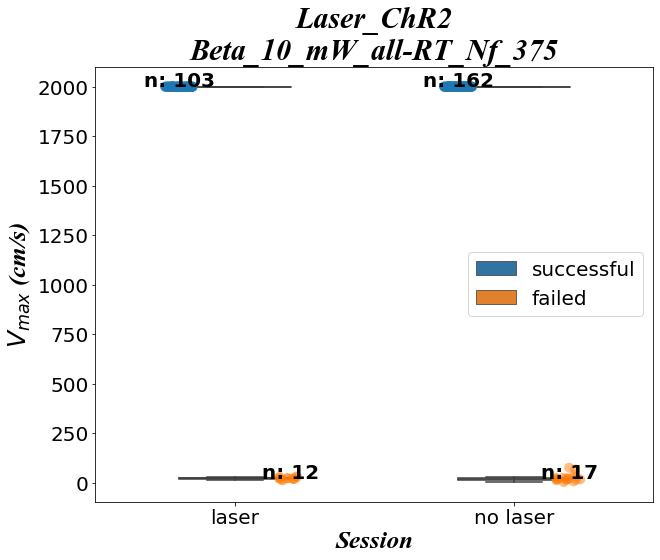

In [17]:
# folder = "Square_2-5_mW_partial-MT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Square_5_mW_all-RT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_20_mW_all-RT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_15_mW_all-MT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
folder = "Beta_10_mW_all-RT_Nf_375" ; exp_par = 'Laser_ChR2' ; frame_height = 400
# folder = "Square_5_mW_partial-MT_Nf_500" ; exp_par = 'Laser_ChR2' ; frame_height = 300

result = build_sessions_transf_to_df(pre_direct, folder,exp_par)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

set_ticks(ax)
ax = sns.stripplot(x="laser", y="v_max(cm/s)", order=["laser", "no laser"],hue="trial",dodge=True, data=result,
                   jitter=True,marker='o', size = 10, alpha=0.5)
ax = sns.boxplot(x="laser", y="v_max(cm/s)", order=["laser", "no laser"],hue="trial",
            data=result, boxprops={'facecolor':'None'}, fliersize = 0,dodge=False,width = 0.4)

medians = result.groupby(['laser','trial'])['v_max(cm/s)'].median()
nobs =  result.groupby(['laser','trial']).apply(lambda x: 'n: {}'.format(len(x)))
for tick, label in enumerate(ax.get_xticklabels()):
    ax_laser = label.get_text()
    for j, ax_trial in enumerate(ax.get_legend_handles_labels()[1][:2]):
        x_offset = (j - 0.5) * 2/5
        med_val = medians[ ax_laser, ax_trial]
        num = nobs[ax_laser, ax_trial]
        
        ax.text(tick + x_offset, med_val + 0.1, num,
                horizontalalignment='center', size=20, color='k', weight='semibold')
# get legend information from the plot object
handles, labels = ax.get_legend_handles_labels()
# specify just one legend
plt.legend(handles[0:2], labels[0:2], fontsize = 20)
plt.ylabel(r'$V_{max}$ (cm/s)').set_fontproperties(font_label)
plt.xlabel('Session').set_fontproperties(font_label)

plt.title(exp_par+'\n'+folder).set_fontproperties(font)
plt.savefig(os.path.join(pre_direct, 'Subplots', 'V_max_Rat_'+folder+'_'+exp_par+
                     '.png'),bbox_inches='tight',orientation='landscape',dpi=200)


## Only successful

/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ArchT/Rat_3/Beta_15_mW_all-MT_Nf_500/Left/Plots  already exists!
/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ArchT/Rat_2/Beta_15_mW_all-MT_Nf_500/Right/Plots  already exists!
/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ArchT/Rat_4/Beta_15_mW_all-MT_Nf_500/Right/Plots  already exists!
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0


/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:890: RuntimeWarning: invalid value encountered in multiply
  self.steps = np.empty((estimated_n_trials, fp_trial)) * np.nan
/home/shiva/Behavioral-Analysis/Rat_lever/Rat_Lever.py:909: RuntimeWarning: invalid value encountered in multiply
  self.laser_ind = np.empty((estimated_n_trials, fp_trial)) * np.nan # stores the indices for laser-on time points


discarded:  0
n trials =  32
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  32
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  32
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  32
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  5
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  32
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 1

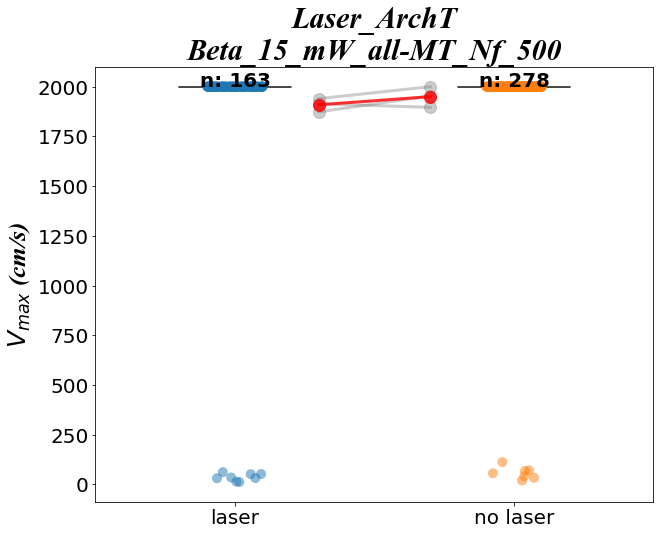

In [18]:
# folder = "Square_2-5_mW_partial-MT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Square_5_mW_all-RT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_20_mW_all-RT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
folder = "Beta_15_mW_all-MT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_10_mW_all-RT_Nf_375" ; exp_par = 'Laser_ChR2' ; frame_height = 400
# folder = "Square_5_mW_partial-MT_Nf_500" ; exp_par = 'Laser_ChR2' ; frame_height = 300

result = build_sessions_transf_to_df(pre_direct, folder,exp_par)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
set_ticks(ax)
ax = sns.stripplot(x="laser", y="v_max(cm/s)", order=["laser", "no laser"],dodge=True, data=result,
                   jitter=True,marker='o', size = 10, alpha=0.5)
ax = sns.boxplot(x="laser", y="v_max(cm/s)", order=["laser", "no laser"], 
            data=result, boxprops={'facecolor':'None'}, fliersize = 0,dodge=False,width = 0.4)

medians = result.groupby(['laser'])['v_max(cm/s)'].median()
nobs =  result.groupby(['laser']).apply(lambda x: 'n: {}'.format(len(x)))
for tick, label in enumerate(ax.get_xticklabels()):
    ax_laser = label.get_text()
    x_offset = tick
    med_val = medians[ ax_laser]
    num = nobs[ax_laser]
        
    ax.text(tick, med_val + 0.1, num,
                horizontalalignment='center', size=20, color='k', weight='semibold')
    
grouped_ave_var = group_and_av_animals(result,y='v_max(cm/s)')
x = [0.3,0.7]
for i in range(grouped_ave_var.shape[0]):
    plt.plot(x,grouped_ave_var[i],'-o',lw = 3, c= 'grey',alpha = 0.4,markersize = 12)
plt.plot(x,np.average(grouped_ave_var,axis = 0),'-o',lw = 3, c= 'r',alpha = 0.8,markersize = 12)


# get legend information from the plot object
# handles, labels = ax.get_legend_handles_labels()
# specify just one legend
# plt.legend(handles[0:2], labels[0:2], fontsize = 20)
plt.ylabel(r'$V_{max}$ (cm/s)').set_fontproperties(font_label)
plt.xlabel('').set_fontproperties(font_label)

plt.title(exp_par+'\n'+folder).set_fontproperties(font)
plt.savefig(os.path.join(pre_direct, 'Subplots', 'v_max_Rat_'+folder+'_'+exp_par+
                     '.png'),bbox_inches='tight',orientation='landscape',dpi=200)
    
# ax = sns.swarmplot(x="day", y="total_bill", hue="smoker",data=tips, palette="Set2", dodge=True)

# Loop to plot each session alone for all days 6-OHDA

0.2
0.5235987755982988
/home/shiva/Desktop/Rat_Lever_Analysis/6OHDA/Rat_12/Day_0/DLC/Rat 12 head 1 6OHDA x2 04-06-19_20190604_180719_C001H001S0001DLC_resnet50_Rat_lever_Ana_Rat_12May6shuffle1_250000.csv
to discard  1
before [2.62567342 2.5087818 ]
after [2.75063486 2.72251548]
# second order jitter : 1
n trials =  42
[194 115  90 230 220 160  85 106  99 133 184 105 314 125  82 169  83  76
 108 130 100 153 154 113  67  58  54  96  67  99  49  61  61  55  78  64
  50  65  73 107  64]
[ 94  51  23 113  79  46  19   2  23  45 105  42   0  35   0  98   0  23
  41  10  29  41  47  42   0   0   0   1   0   0   0   0   0   0   0   0
   0   0   0   2   0]


/home/shiva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:417: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


/home/shiva/Desktop/Rat_Lever_Analysis/6OHDA/Rat_12/Day_0/DLC/Rat 12 head 1 6OHDA x2 04-06-19_20190604_182008_C001H001S0001DLC_resnet50_Rat_lever_Ana_Rat_12May6shuffle1_250000.csv
to discard  1
before [1.9323854  1.93818054 1.91674369 1.93157087 1.91553853 1.91578456]
after [5.63831903 5.63831903 5.63831903 5.63831903 5.63831903 5.63831903]
before [2.7091233]
after [3.93897792]
before [2.79551886]
after [3.75852647]
# second order jitter : 3
n trials =  42
[200 148 311 124 154 303  78 149 107 168 106 124  80 222  60  73 144  50
  61  55  83 134  62  96  78  68 108 244  66  77 142 153  86  91  66 109
 117 216 184]
[ 92  38 218   0  46  71   8  60  42  88   1  10   0  80   0   0   2   0
   0   0   1   0   0   0   0   0  52   2   0   1   0   2  27   0   0   1
   4  27  89]
/home/shiva/Desktop/Rat_Lever_Analysis/6OHDA/Rat_12/Day_0/DLC/Rat 12 head 1 6OHDA x2 04-06-19_20190604_182821_C001H001S0001DLC_resnet50_Rat_lever_Ana_Rat_12May6shuffle1_250000.csv
to discard  1
# second order jitter : 0

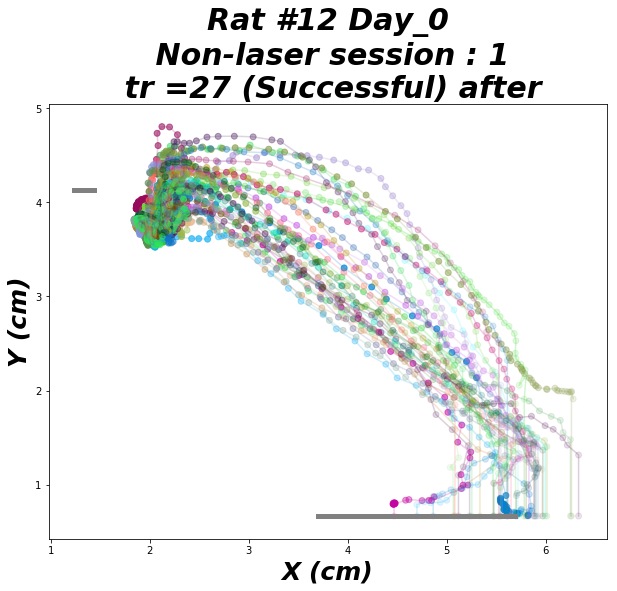

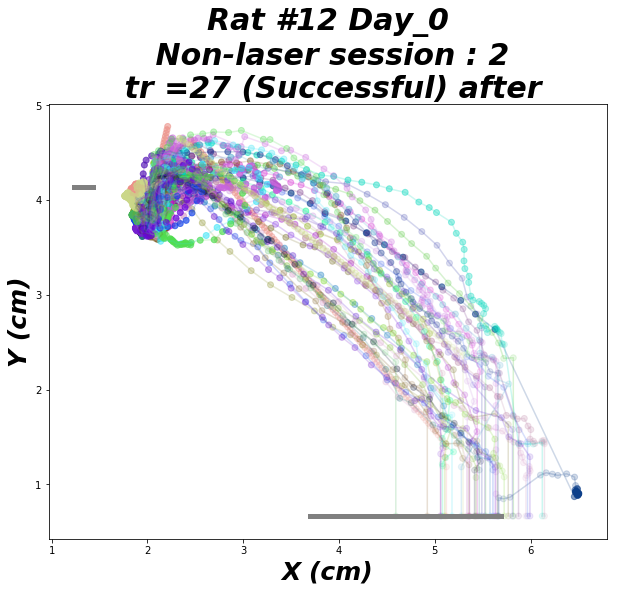

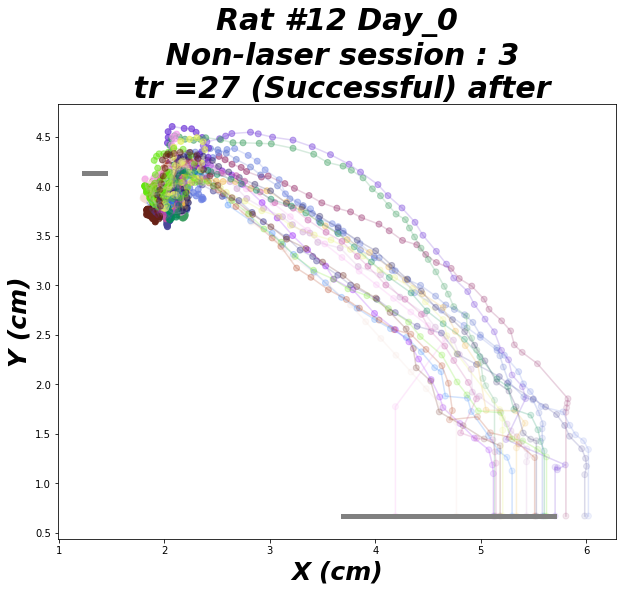

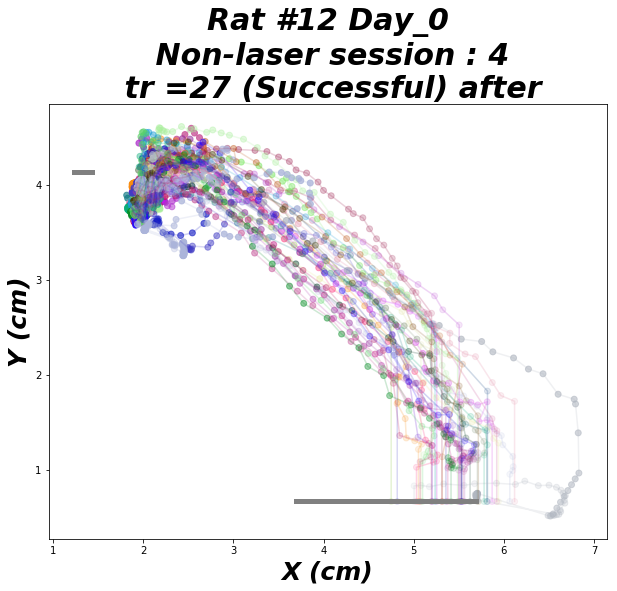

In [9]:

cfg['fp_trial'] = 375 # number of frames per trial
np.random.seed(10)
rat_no = 12
cfg['r_or_l'] = 'L'
# folder_list = ['Day_-1','Day_0','Day_7','Day_8','Day_9','Day_10']
folder_list = ['Day_0']
direct = pre_direct +'/6OHDA'+'/Rat_' +str(rat_no)+ '/'  # directory to the folder for each mouse
extension = ".csv"
cfg['p_cutoff'] = 0.8
cfg['max_speed'] = 50 # cm/s # the max speed of the rat derived from average trajectory 
cfg['max_delta_r_per_frame'] = cfg['max_speed']/cfg['fps']
print(cfg['max_delta_r_per_frame'])
cfg['max_delta_r_per_frame'] =cfg['max_delta_r_per_frame']
cfg['jitter_proximity_thresh_rho'] = 0.7 # the acceptable jitter in r coordinate to be considered as the samr jump
cfg['thresh_adjust'] = 1/5 # if there are 5 jemped points the threshold is <cfg['jitter_proximity_thresh_rho']>
cfg['jitter_proximity_thresh_phi'] = 30/180*np.pi
print(cfg['jitter_proximity_thresh_phi'])
m = 27
for folder in folder_list:
    files_list_DLC = list_all_files(direct+folder+'/DLC/','.csv')
    files_list_LED = list_all_files(direct+folder+'/LED/','.csv')
    for i in range(len(files_list_DLC)):
#     for i in range(1,2):
        print(files_list_DLC[i])
        df = read_DLC_csv(files_list_DLC[i],cfg['fp_trial'])
        df_LED = read_LED_csv(files_list_LED[i],len(df.index))
        where_plot,what_plot = [0],0
        body_part = cfg['body_part_list'][where_plot]
        path = direct+folder
        session = extract_epochs(df,df_LED, cfg['r_or_l'],path,folder,cfg['fp_trial'],body_part,cfg['frame_height'],cfg['n_timebin'],
                                 cfg['velocity_mask'],cfg['p_cutoff'],cfg['pad_thresh'],cfg['max_delta_r_per_frame'],cfg['pad_length_cm'],cfg['t_s'],cfg['max_delta_r_per_frame'])

        failed = Failed(session)
        successful = Successful(session)    

        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), sharey=True)
        ax = plt.subplot(111)
        
        for j in range (successful.n_trials-1):
#         for j in range (m,m+1):

            successful.epochs_x[j,successful.likelihood[j] < cfg['p_cutoff']] = -1
            overall_ind, = np.where(successful.epochs_x[j,:] != -1 )
            alphas = np.linspace(0.1, 1, len(overall_ind))
            rgba_colors = np.zeros((len(overall_ind),4))
            rgba_colors[:,:-1] = np.random.random((3))
            rgba_colors[:, 3] = alphas
            plt.scatter(successful.epochs_x[j,overall_ind],successful.epochs_y[j,overall_ind], color = rgba_colors )
            plt.plot(successful.epochs_x[j,overall_ind],successful.epochs_y[j,overall_ind],alpha = 0.2, color = rgba_colors[0,:-1] )
        plt.plot([session.lever_x[0] - 0.1, session.lever_x[0] + 0.1],[session.lever_y[0],session.lever_y[0]],lw = 5, c = 'grey')
        plt.plot([session.pad_left_x[0],session.pad_right_x[0]],[session.pad_y[0],session.pad_y[0]],lw = 5, c = 'grey')

        plt.title("Rat #"+str(rat_no)+" "+folder+"\n Non-laser session : "+str(i+1)+"\n tr ="+str(m)+" (Successful) after").set_fontproperties(font)
        plt.ylabel("Y (cm)").set_fontproperties(font_label)
        plt.xlabel("X (cm)").set_fontproperties(font_label)
#         plt.legend(fontsize = 10)
#         plt.xlim(1,6)
#         plt.ylim(3.5,7)
#         ax[1] = plt.subplot(122)
#         set_ticks(ax[1])
#         for i in range (0,failed.n_trials):
#             failed.epochs_x[i,failed.likelihood[i] < cfg['p_cutoff']] = -1 # remove frames with small likelihood
#             overall_ind, = np.where(failed.epochs_x[i,:] != -1 )
#             alphas = np.linspace(0.1, 1, len(overall_ind))
#             rgba_colors = np.zeros((len(overall_ind),4))
#             rgba_colors[:,:-1] = np.random.random((3))
#             rgba_colors[:, 3] = alphas
#             plt.scatter(failed.epochs_x[i,overall_ind],failed.epochs_y[i,overall_ind], color = rgba_colors )
#             plt.plot(failed.epochs_x[i,overall_ind],failed.epochs_y[i,overall_ind],alpha = 0.2, color = rgba_colors[0,:-1] )

#         plt.plot([session.lever_x[0] - 0.1, session.lever_x[0] + 0.1],[session.lever_y[0],session.lever_y[0]],lw = 5, c = 'grey')
#         plt.plot([session.pad_left_x[0],session.pad_right_x[0]],[session.pad_y[0],session.pad_y[0]],lw = 5, c = 'grey')

#         plt.title("Rat #"+str(rat_no)+" "+folder+"\n Non-Laser session : "+str(i+1)+'\n (Failed)').set_fontproperties(font)
#         plt.ylabel("Y (cm)").set_fontproperties(font_label)
#         plt.xlabel("X (cm)").set_fontproperties(font_label)
# #         plt.legend(fontsize = 10)
# #         plt.xlim(1,7)
# #         plt.ylim(3.5,7.5)
#         set_ticks(ax[1])
        plt.savefig(pre_direct+'/Subplots/'+'Rat_'+str(rat_no)+'_'+folder+'_successful_session = '+str(i+1)+
                     '.png',bbox_inches='tight',orientation='landscape',dpi=200)

# Test: jitter removal using likelihood

0.2
0.5235987755982988
/home/shiva/Desktop/Rat_Lever_Analysis/6OHDA/Rat_12/Day_0/DLC/Rat 12 head 1 6OHDA x2 04-06-19_20190604_182008_C001H001S0001DLC_resnet50_Rat_lever_Ana_Rat_12May6shuffle1_250000.csv
to discard  1
n trials =  43


/home/shiva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:435: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


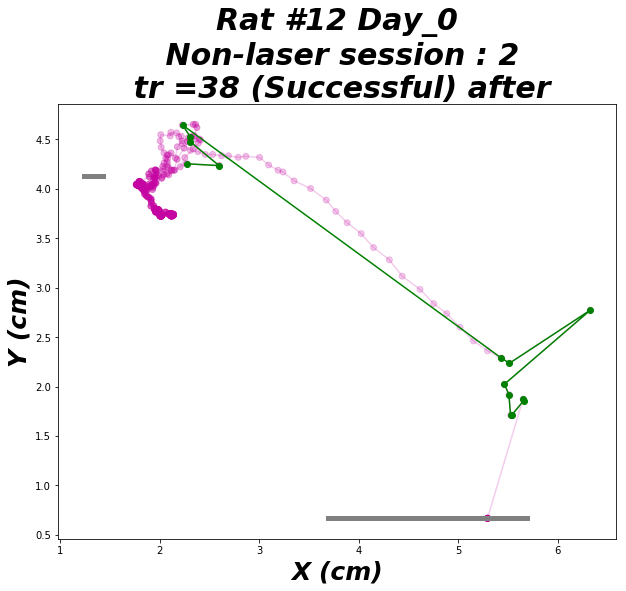

In [92]:

def correct_lasting_labeling_jitter(epochs_x, epochs_y,likelihood,to_keep, cfg['max_delta_r_per_frame'],t,cfg['fp_trial']):
    ''' correct the detections exceeding the max speed of the mouse (chekcing for r) with
        extrapolation with a straight line. Thus enforcing corrections to be dependent on early detections.
        for early jitters t extra points are provided before time zero if the paw is definitly at pad proximity by 
        <set_points_around_the_pad> function.
        '''
    count = 0
    for i in range(epochs_x.shape[0]): # go over trials
#     for i in range(m,m+1): # go over single trial
        x_copy = np.copy(epochs_x[i,likelihood[i] > cfg['p_cutoff']]) 
        y_copy = np.copy(epochs_y[i,likelihood[i] > cfg['p_cutoff']]) 
        if len(x_copy) < cfg['fp_trial']/4: 
            to_keep[i] = False
            continue
        shifted_x = shift((x_copy), 1, cval=0) #  shifts in a periodic manner, hence the next line
        shifted_x[0] = shifted_x[1] # set the shifted value 
        deltas_before_x = np.copy(shifted_x - x_copy)

        shifted_y = shift((y_copy), 1, cval=0) # np.roll shifts in a periodic manner, hence the next line
        shifted_y[0] = shifted_y[1] # set the shifted value 
        deltas_before_y =  np.copy(shifted_y - y_copy)
        
        x,y,deltas_x,deltas_y = set_points_around_the_pad(x_copy,y_copy,
                                                        deltas_before_x, deltas_before_y,t)
#         print(epochs_x[i])
#         print(x)
        rho,phi = cart2pol(deltas_x,deltas_y) # we have the displacement vector in polar coordinates
        ind, = np.where(rho > cfg['max_delta_r_per_frame']) # find the jumps
#         print("ind",ind)
        ind = ind[ind > t] # leave room for having reference before the jump
#         if len(ind) > 0: 
#             print("x",x[ind[0]-1:ind[-1]+1])
#             print("y",y[ind[0]-1:ind[-1]+1])
#             print("rho",rho[ind[0]-1:ind[-1]+1])
#         print("delta",deltas_before_x[m,ind[0]-1:ind[-1]+1])
        if len(ind) >= 2: # since we're checking for back and forths we need couples            
            for j in range (0,len(ind)-1):
#                 print("j",ind[j] , ind[j+1])
#                 print("delta rho",rho[ind[j]] - rho[ind[j+1]])
#                 print("delta phi",(abs(abs(phi[ind[j]] - phi[ind[j+1]])-np.pi))*180/np.pi)
                if abs(rho[ind[j]] - rho[ind[j+1]]) < cfg['jitter_proximity_thresh_rho'] and abs(abs(phi[ind[j]] - phi[ind[j+1]])-np.pi) < cfg['jitter_proximity_thresh_phi']: 
                ## check to see if there is an approximatly same size backward jump to the correct path from this jump
                    print("in")
                    # referece provided by average of t points before the jump
                    ref_av_x = np.sum(x[ind[j]-t:ind[j]-1])/ len((x[ind[j]-t:ind[j]-1])) 
                    ref_av_y = np.sum(y[ind[j]-t:ind[j]-1])/ len((y[ind[j]-t:ind[j]-1]))
                    n_points_to_correct = len((x[ind[j]:ind[j+1]])) # number of points included in the jump
                    # average of jumped points provided by average of points included in the jump
                    av_x = np.sum(x[ind[j]:ind[j+1]])/ n_points_to_correct
                    av_y = np.sum(y[ind[j]:ind[j+1]])/n_points_to_correct
                    
                    r_ref,theta_ref = cart2pol(ref_av_x,ref_av_y)# get a vector pointing to reference average  
                    r_av,theta_av = cart2pol(av_x,av_y)# get a vector pointing to jump average 
#                     print("Rs",r_av,r_ref)
#                     print("thetas",theta_av,theta_ref)
                    print((n_points_to_correct*cfg['jitter_proximity_thresh_rho']*cfg['thresh_adjust']))
                    print((n_points_to_correct*cfg['jitter_proximity_thresh_phi']*cfg['thresh_adjust']/2))

                    # since points are corrected as we go. If this is not a forth and back, the reference and jump vectors would be almost the same
                    if abs(r_av - r_ref) <  (n_points_to_correct
                    *cfg['jitter_proximity_thresh_rho']*cfg['thresh_adjust']) and abs(theta_av - theta_ref) < (n_points_to_correct
                    *cfg['jitter_proximity_thresh_phi']*cfg['thresh_adjust']/2):
                        continue # if these criteria aren't met this not a forth and back of a jump but the back and forth of two consecutive jumps
                    
                    p1 = np.array([x[ind[j]-1],y[ind[j]-1]])
                    p2 = np.array([x[ind[j+1]],y[ind[j+1]]])
                    print("points", p1,p2)
                    correction_x,correction_y = equidistant_points_between(p1, p2, n_p_between = ind[j+1]- ind[j])# extrapolate the correction for jumped points using
                     
                    count += 1
                    ind = ind - t
#                     print(y_copy[ind[j]:ind[j+1]])
                    x_copy[ind[j]:ind[j+1]] = correction_x
                    y_copy[ind[j]:ind[j+1]] = correction_y
#                     print(y_copy[ind[j]:ind[j+1]])
        epochs_x[i,likelihood[i] > cfg['p_cutoff']] = x_copy
#         print("epochs",epochs_x[i,likelihood[i] > cfg['p_cutoff']])
        epochs_y[i,likelihood[i] > cfg['p_cutoff']] = y_copy
    print("# second order jitter :", count)
    return epochs_x, epochs_y,to_keep
def extract_epochs(df,df_LED, cfg['r_or_l'],path,folder,cfg['fp_trial'],body_part,cfg['frame_height'],cfg['n_timebin'],cfg['velocity_mask'],
                   cfg['p_cutoff'],cfg['pad_thresh'],cfg['max_delta_r_per_frame'],cfg['pad_length_cm'],cfg['t_s'],cfg['max_delta_r_per_frame']):
    '''extract epochs of one session 
        return the session class containing all the info for the session'''

    scale_pix_to_cm = set_pix_scale(df_LED,cfg['pad_length_cm'])
#     variable_x , variable_y = average_position(df,body_part,cfg['r_or_l'],cfg['fp_trial'],scale_pix_to_cm)
    x , y, likelihood = position(df,body_part,cfg['r_or_l'],scale_pix_to_cm)
    y = cfg['frame_height']*scale_pix_to_cm - y # image has decreasing y instead of increasing

    session = Session(folder)
    session.set_epochs(x, y,likelihood, cfg['fp_trial']) # reshapes to separate trials  
    session.set_properties(path,df_LED, cfg['r_or_l'], cfg['fp_trial'],cfg['pad_thresh'],cfg['frame_height'])
    session.apply_pad_constraint(cfg['p_cutoff'],cfg['r_or_l'])
    session.epochs_x, session.epochs_y = correct_labeling_jitter(session.epochs_x, session.epochs_y,
                                                session.likelihood,cfg['cfg['max_delta_r_per_frame']'], cfg['t_s'])
#     session.epochs_x, session.epochs_y,session.to_keep = correct_lasting_labeling_jitter(session.epochs_x, session.epochs_y,
#                                                 session.likelihood,session.to_keep,cfg['max_delta_r_per_frame'], cfg['t_s'],cfg['fp_trial'])
#     session.correct_small_likelihoods(cfg['p_cutoff'],cfg['cor_t_prox_thresh'])
    session.calculate_steps_traveled(cfg['max_delta_r_per_frame']) # get the steps before masking 
    session.calculate_velocity(cfg['n_timebin'])
#     session.discard_unacceptable_trials()
#     session.mask_beginnings_and_end_of_trials(cfg['velocity_mask'],cfg['max_delta_r_per_frame'])
    print("n trials = ",session.n_trials)
    return session

cfg['fp_trial'] = 375 # number of frames per trial
np.random.seed(10)
rat_no = 12
cfg['r_or_l'] = 'L'
# folder_list = ['Day_-1','Day_0','Day_7','Day_8','Day_9','Day_10']
folder_list = ['Day_0']
direct = pre_direct +'/6OHDA'+'/Rat_' +str(rat_no)+ '/'  # directory to the folder for each mouse
extension = ".csv"
cfg['p_cutoff'] = 0.8
cfg['max_speed'] = 50 # cm/s # the max speed of the rat derived from average trajectory 
cfg['max_delta_r_per_frame'] = cfg['max_speed']/cfg['fps']
print(cfg['max_delta_r_per_frame'])
cfg['max_delta_r_per_frame'] =cfg['max_delta_r_per_frame']
cfg['jitter_proximity_thresh_rho'] = 0.7 # the acceptable jitter in r coordinate to be considered as the samr jump
cfg['thresh_adjust'] = 1/5 # if there are 5 jemped points the threshold is <cfg['jitter_proximity_thresh_rho']>
cfg['jitter_proximity_thresh_phi'] = 30/180*np.pi
print(cfg['jitter_proximity_thresh_phi'])
m = 38
for folder in folder_list:
    files_list_DLC = list_all_files(direct+folder+'/DLC/','.csv')
    files_list_LED = list_all_files(direct+folder+'/LED/','.csv')
#     for i in range(len(files_list_DLC)):
    for i in range(1,2):
        print(files_list_DLC[i])
        df = read_DLC_csv(files_list_DLC[i],cfg['fp_trial'])
        df_LED = read_LED_csv(files_list_LED[i],len(df.index))
        where_plot,what_plot = [0],0
        body_part = cfg['body_part_list'][where_plot]
        path = direct+folder
        session = extract_epochs(df,df_LED, cfg['r_or_l'],path,folder,cfg['fp_trial'],body_part,cfg['frame_height'],cfg['n_timebin'],
                                 cfg['velocity_mask'],cfg['p_cutoff'],cfg['pad_thresh'],cfg['max_delta_r_per_frame'],cfg['pad_length_cm'],cfg['t_s'],cfg['max_delta_r_per_frame'])
        
        failed = Failed(session)
        successful = Successful(session)
        
#         successful.epochs_x, successful.epochs_y = correct_lasting_labeling_jitter(successful.epochs_x, successful.epochs_y,
#                                                 successful.likelihood,cfg['max_delta_r_per_frame'], cfg['t_s'],cfg['fp_trial'])
#         successful.mask_beginnings_and_end_of_trials(cfg['velocity_mask'],cfg['max_delta_r_per_frame'])

#         print(successful.n_trials, session.n_trials, failed.n_trials)

        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), sharey=True)
        ax = plt.subplot(111)
#         successful.correct_small_likelihoods(cfg['p_cutoff'],cfg['cor_t_prox_thresh'])

#         for j in range (successful.n_trials-1):
        for j in range (m,m+1):

#             successful.epochs_x[j,successful.likelihood[j] < cfg['p_cutoff']] = -1
#             if len(np.where((successful.epochs_y[j,:] < session.lever_y[0]) & (successful.epochs_x[j,:] < 2.5)& (successful.epochs_x[j,:] > 1.5))[0]) != 0:
#                 print(j)

            overall_ind, = np.where(successful.epochs_x[j,:] != -1 )
            low_p_ind, = np.where(successful.likelihood[j] < cfg['p_cutoff'] )
            alphas = np.linspace(0.1, 1, len(overall_ind))
            rgba_colors = np.zeros((len(overall_ind),4))
            rgba_colors[:,:-1] = np.random.random((3))
            rgba_colors[:, 3] = alphas
            plt.scatter(successful.epochs_x[j,overall_ind],successful.epochs_y[j,overall_ind], color = rgba_colors )
            plt.plot(successful.epochs_x[j,overall_ind],successful.epochs_y[j,overall_ind],alpha = 0.2, color = rgba_colors[0,:-1] )
            plt.plot(successful.epochs_x[j,low_p_ind],successful.epochs_y[j,low_p_ind], '-o',color = 'g' )

#         print(successful.pad_off_t)
        plt.plot([session.lever_x[0] - 0.1, session.lever_x[0] + 0.1],[session.lever_y[0],session.lever_y[0]],lw = 5, c = 'grey')
        plt.plot([session.pad_left_x[0],session.pad_right_x[0]],[session.pad_y[0],session.pad_y[0]],lw = 5, c = 'grey')

        plt.title("Rat #"+str(rat_no)+" "+folder+"\n Non-laser session : "+str(i+1)+"\n tr ="+str(m)+" (Successful) after").set_fontproperties(font)
        plt.ylabel("Y (cm)").set_fontproperties(font_label)
        plt.xlabel("X (cm)").set_fontproperties(font_label)
#         plt.legend(fontsize = 10)
#         plt.xlim(1,6)
#         plt.ylim(3.5,7)
#         ax[1] = plt.subplot(122)
#         set_ticks(ax[1])
#         for i in range (0,failed.n_trials):
#             failed.epochs_x[i,failed.likelihood[i] < cfg['p_cutoff']] = -1 # remove frames with small likelihood
#             overall_ind, = np.where(failed.epochs_x[i,:] != -1 )
#             alphas = np.linspace(0.1, 1, len(overall_ind))
#             rgba_colors = np.zeros((len(overall_ind),4))
#             rgba_colors[:,:-1] = np.random.random((3))
#             rgba_colors[:, 3] = alphas
#             plt.scatter(failed.epochs_x[i,overall_ind],failed.epochs_y[i,overall_ind], color = rgba_colors )
#             plt.plot(failed.epochs_x[i,overall_ind],failed.epochs_y[i,overall_ind],alpha = 0.2, color = rgba_colors[0,:-1] )

#         plt.plot([session.lever_x[0] - 0.1, session.lever_x[0] + 0.1],[session.lever_y[0],session.lever_y[0]],lw = 5, c = 'grey')
#         plt.plot([session.pad_left_x[0],session.pad_right_x[0]],[session.pad_y[0],session.pad_y[0]],lw = 5, c = 'grey')

#         plt.title("Rat #"+str(rat_no)+" "+folder+"\n Non-Laser session : "+str(i+1)+'\n (Failed)').set_fontproperties(font)
#         plt.ylabel("Y (cm)").set_fontproperties(font_label)
#         plt.xlabel("X (cm)").set_fontproperties(font_label)
# #         plt.legend(fontsize = 10)
# #         plt.xlim(1,7)
# #         plt.ylim(3.5,7.5)
#         set_ticks(ax[1])
        plt.savefig(pre_direct+'/Subplots/'+'Rat_'+str(rat_no)+'_'+folder+'_successful_session = '+str(i+1)+
                     '.png',bbox_inches='tight',orientation='landscape',dpi=200)

# Test: jitter removal without likelihood

In [57]:
def set_points_around_the_pad(x,y,delta_x,delta_y,pad_off_t,t,pad_x,pad_y):
    ''' concatenate t elements before pad off  '''
    cfg['t_s']tart = 0
    if pad_off_t < t:
        
#         print("paw at pad off",x[pad_off_t], y[pad_off_t])
        # check to see if the paw leaves the pad at the pad proximity
        if (pad_x[0] < x[pad_off_t] < pad_x[1]) and (pad_y[0] < y[pad_off_t] < pad_y[1]):
#             print("voila")
            x = np.hstack((np.repeat(x[0],t),x)) 
            y = np.hstack((np.repeat(y[0],t),y)) 
            delta_x = np.hstack((np.zeros((t)),delta_x)) 
            delta_y = np.hstack((np.zeros((t)),delta_y)) 
            
            cfg['t_s']tart = t
    return x,y,delta_x,delta_y,cfg['t_s']tart
def correct_lasting_labeling_jitter(epochs_x, epochs_y,pad_off_t, cfg['max_delta_r_per_frame'],t,cfg['fp_trial'],pad_x,pad_y):
    ''' correct the detections exceeding the max speed of the mouse (chekcing for r) with
        extrapolation of previous time step velocities. Thus enforcing corrections to be dependent on early detections.
        for early jitters t extra points are provided before time zero if the paw is definitly at pad proximity by 
        <set_points_around_the_pad> function. This function was written before using likelihoods.
        '''
#     epochs_x = epochs_x.reshape(int(len(epochs_x)/cfg['fp_trial']),cfg['fp_trial'])# reshape to separate trials
#     epochs_y = epochs_y.reshape(int(len(epochs_y)/cfg['fp_trial']),cfg['fp_trial'])
    x_copy = np.copy(epochs_x) 
    y_copy = np.copy(epochs_y) 
    shifted_x = np.roll((x_copy), 1, axis=1) # np.roll shifts in a periodic manner, hence the next line
    shifted_x[:,0] = shifted_x[:,1] # set the shifted value 
    deltas_before_x = np.copy(shifted_x - x_copy)

    shifted_y = np.roll((y_copy), 1, axis=1) # np.roll shifts in a periodic manner, hence the next line
    shifted_y[:,0] = shifted_y[:,1] # set the shifted value 
    deltas_before_y =  np.copy(shifted_y - y_copy)
    count = 0
#     for i in range(epochs_x.shape[0]): # go over trials
    for i in range(m,m+1): # go over single trial
#         print(deltas_before_y.shape,pad_off_t.shape)
        x,y,deltas_x,deltas_y,cfg['t_s']tart = set_points_around_the_pad(epochs_x[i],epochs_y[i],
                                                        deltas_before_x[i], deltas_before_y[i],pad_off_t[i],t,pad_x,pad_y)
        
        rho,phi = cart2pol(deltas_x,deltas_y) # we have the displacement vector in polar coordinates
#         rho,phi = cart2pol(deltas_before_x[i],deltas_before_y[i]) # we have the displacement vector in polar coordinates

        ind, = np.where(rho > cfg['max_delta_r_per_frame']) # find the jumps
#         print("ind",ind)
        ind = ind[ind > t] # leave room for having velocity reference before the jump
#         if len(ind)>0: 
#             print("x",x[ind[0]-1:ind[-1]+1])
#             print("rho",rho[ind[0]-1:ind[-1]+1])
#         print("delta",deltas_before_x[m,ind[0]-1:ind[-1]+1])
        if len(ind) > 2: # since we're checking for back and forths we need couples            
            for j in range (0,len(ind)-1):
                print("j",ind[j] , ind[j+1])
                print("delta rho",rho[ind[j]] - rho[ind[j+1]])
                print("delta phi",(abs(abs(phi[ind[j]] - phi[ind[j+1]])-np.pi))*180/np.pi)
                if abs(rho[ind[j]] - rho[ind[j+1]]) < cfg['jitter_proximity_thresh_rho'] and abs(abs(phi[ind[j]] - phi[ind[j+1]])-np.pi) < cfg['jitter_proximity_thresh_phi']: 
                ## check to see if there is an approximatly same size backward jump to the correct path from this jump
                    print("in")
                    # referece provided by average of t points before the jump
                    ref_av_x = np.sum(x[ind[j]-t:ind[j]-1])/ len((x[ind[j]-t:ind[j]-1])) 
                    ref_av_y = np.sum(y[ind[j]-t:ind[j]-1])/ len((y[ind[j]-t:ind[j]-1]))
                    n_points_to_correct = len((x[ind[j]:ind[j+1]])) # number of points included in the jump
                    # average of jumped points provided by average of points included in the jump
                    av_x = np.sum(x[ind[j]:ind[j+1]])/ n_points_to_correct
                    av_y = np.sum(y[ind[j]:ind[j+1]])/n_points_to_correct
                    
                    r_ref,theta_ref = cart2pol(ref_av_x,ref_av_y)# get a vector pointing to reference average  
                    r_av,theta_av = cart2pol(av_x,av_y)# get a vector pointing to jump average 
#                     print("Rs",r_av,r_ref)
#                     print("thetas",theta_av,theta_ref)
#                     print((n_points_to_correct*cfg['jitter_proximity_thresh_phi']*cfg['thresh_adjust']))
                    # since points are corrected as we go. If this is not a forth and back, the reference and jump vectors would be almost the same
                    if abs(r_av - r_ref) <  (n_points_to_correct
                    *cfg['jitter_proximity_thresh_rho']*cfg['thresh_adjust']) and abs(theta_av - theta_ref) < (n_points_to_correct
                    *cfg['jitter_proximity_thresh_phi']*cfg['thresh_adjust']/2):
                        print("dismiss")
                        continue # if these criteria aren't met this not a forth and back of a jump but the back and forth of two consecutive jumps
                    # provide a velocity reference from reference points before the jump
                    velocity_x = np.sum(deltas_before_x[ind[j]-t:ind[j]-1])/(t-1)
                    velocity_y = np.sum(deltas_before_y[ind[j]-t:ind[j]-1])/(t-1)
                    # extrapolate the correction for jumped points using the reference velocity
                    correction_x = (np.arange(ind[j+1]-ind[j])+1)*velocity_x + x[ind[j]-1]
                    correction_y = (np.arange(ind[j+1]-ind[j])+1)*velocity_y + y[ind[j]-1]
#                     print("wrong",x[ind[j]:ind[j+1]],y[ind[j]:ind[j+1]])
                    count += 1
                    ind = ind - cfg['t_s']tart
                    epochs_x[i,ind[j]:ind[j+1]] = correction_x
                    epochs_y[i,ind[j]:ind[j+1]] = correction_y
#                     print("Correct",epochs_x[i,ind[j]:ind[j+1]],correction_y)
#         print(epochs_x[m,ind[0]-1:ind[-1]+1])
    print("# second order jitter :", count)
#     return epochs_x.flatten().reshape(-1,1), epochs_y.flatten().reshape(-1,1)
    return epochs_x, epochs_y

def correct_labeling_jitter(x, y, cfg['max_delta_r_per_frame'],cfg['t_s'],cfg['fp_trial']):
    ''' correct the single point jitters in detections exceeding the max speed of the mouse with
        the average of before and after time stamps 
        '''

    x_copy = np.copy(x)
    y_copy = np.copy(y)
    xx = np.concatenate((np.repeat(x_copy[:,0].reshape(-1,1),cfg['t_s']+1,axis = 1),x_copy,
                         np.repeat(x_copy[:,-1].reshape(-1,1),cfg['t_s']+1,axis = 1)),axis = 1) # repeat boundaries to avoid boundary condition
    yy = np.concatenate((np.repeat(y_copy[:,0].reshape(-1,1),cfg['t_s']+1,axis = 1),y_copy,
                         np.repeat(y_copy[:,-1].reshape(-1,1),cfg['t_s']+1,axis = 1)),axis = 1) # repeat boundaries to avoid boundary condition

    
    shifted_x = np.roll(np.copy(x_copy), 1, axis=1) # np.roll shifts in a periodic manner, hence the next line
    shifted_x[:,0] = shifted_x[:,1] # set the shifted value 
    deltas_before_x = shifted_x - x_copy
    shifted_x = np.roll(np.copy(x_copy), -1, axis=1) # np.roll shifts in a periodic manner, hence the next line
    shifted_x[:,-1] = shifted_x[:,-2] # set the shifted value equal to the boundary
    deltas_after_x = x_copy -  shifted_x

    shifted_y = np.roll(np.copy(y_copy), 1, axis=1) # np.roll shifts in a periodic manner, hence the next line
    shifted_y[:,0] = shifted_y[:,1] # set the shifted value 
    deltas_before_y = shifted_y - y_copy
    shifted_y = np.roll(np.copy(y_copy), -1, axis=1) # np.roll shifts in a periodic manner, hence the next line
    shifted_y[:,-1] = shifted_y[:,-2] # set the shifted value equal to the boundary
    deltas_after_y = y_copy -  shifted_y

    deltas_after = np.sqrt(np.power(deltas_after_x,2)+np.power(deltas_after_y,2))
    deltas_before = np.sqrt(np.power(deltas_before_x,2)+np.power(deltas_before_y,2))
    ind_bef = np.where(np.absolute(deltas_before) > cfg['max_delta_r_per_frame'])
    ind_aft = np.where(np.absolute(deltas_after) > cfg['max_delta_r_per_frame'])


    bool_ind = np.logical_and(np.absolute(deltas_after) > cfg['max_delta_r_per_frame'],np.absolute(deltas_before) > cfg['max_delta_r_per_frame'])
    ind_row,ind_col = np.where(bool_ind == True)
    ind = np.vstack((ind_row,ind_col+cfg['t_s']+1)).T # tuples of indices (col+cfg['t_s']+1 bc the array is sandwitched to avoid boundary prob)
    if len(ind_row) > 0: # if jumped in detection set to the mean of <cfg['t_s']> previous and next detections
        x_copy[ind_row,ind_col] = np.hstack([np.average(xx[i,j-cfg['t_s']-1:j-1])+np.average(xx[i,j+1:j+cfg['t_s']+1]) for i,j in ind])/2
        y_copy[ind_row,ind_col] = np.hstack([np.average(yy[i,j-cfg['t_s']-1:j-1])+np.average(yy[i,j+1:j+cfg['t_s']+1]) for i,j in ind])/2
        print("# jitter in DLC  = ", len(ind_row))                                     

    return x_copy,y_copy

cfg['max_speed'] = 50 # cm/s # the max speed of the rat derived from average trajectory 
cfg['max_delta_r_per_frame'] = cfg['max_speed']/cfg['fps']
print(cfg['max_delta_r_per_frame'])
cfg['max_delta_r_per_frame'] =cfg['max_delta_r_per_frame']
cfg['jitter_proximity_thresh_rho'] = 0.2 # the acceptable jitter in r coordinate to be considered as the samr jump
cfg['thresh_adjust'] = 1/5 # if there are 5 jemped points the threshold is <cfg['jitter_proximity_thresh_rho']>
cfg['jitter_proximity_thresh_phi'] = 30/180*np.pi


cfg['fp_trial'] = 375 # number of frames per trial
np.random.seed(10)
rat_no = 12
cfg['r_or_l'] = 'L'
# folder_list = ['Day_-1','Day_0','Day_7','Day_8','Day_9','Day_10']
folder_list = ['Day_0']
direct = pre_direct +'/6OHDA'+'/Rat_' +str(rat_no)+ '/'  # directory to the folder for each mouse
extension = ".csv"

m = 25
for folder in folder_list:
    files_list_DLC = list_all_files(direct+folder+'/DLC/','.csv')
    files_list_LED = list_all_files(direct+folder+'/LED/','.csv')
    for i in range(1,2):#len(files_list_DLC)):
#     for i in range(len(files_list_DLC)):

        print(files_list_DLC[i])
        df = read_DLC_csv(files_list_DLC[i],cfg['fp_trial'])
        df_LED = read_LED_csv(files_list_LED[i],len(df.index))
        where_plot,what_plot = [0],0
        body_part = cfg['body_part_list'][where_plot]
        path = direct+folder
        cfg['jitter_proximity_thresh_rho'] = 0.2
        cfg['max_delta_r_per_frame'] = cfg['max_delta_r_per_frame']
        session = extract_opto_epochs(df,df_LED, cfg['r_or_l'],path,folder,cfg['fp_trial'],body_part,cfg['frame_height'],cfg['n_timebin'],
                                 cfg['velocity_mask'])
        session.discard_unacceptable_trials()
        session.mask_beginnings_and_end_of_trials(cfg['velocity_mask'],cfg['max_delta_r_per_frame'])
        failed = Failed(session)
        successful = Successful(session)
#         print(successful.n_trials, session.n_trials, failed.n_trials)

        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), sharey=True)
        ax[0] = plt.subplot(121)
        
        for j in range (m,m+1):#successful.n_trials-1):
#         for j in range (successful.n_trials-1):
#             print("pad off",successful.pad_off_t[j])
            overall_ind, = np.where(successful.epochs_x[j,:] != -1 )
            alphas = np.linspace(0.1, 1, len(overall_ind))
            rgba_colors = np.zeros((len(overall_ind),4))
            rgba_colors[:,:-1] = np.random.random((3))
            rgba_colors[:, 3] = alphas
            plt.scatter(successful.epochs_x[j,overall_ind],successful.epochs_y[j,overall_ind], color = rgba_colors )
            plt.plot(successful.epochs_x[j,overall_ind],successful.epochs_y[j,overall_ind],alpha = 0.2, color = rgba_colors[0,:-1] )

        plt.plot([session.lever_x[0] - 0.1, session.lever_x[0] + 0.1],[session.lever_y[0],session.lever_y[0]],lw = 5, c = 'grey')
        plt.plot([session.pad_left_x[0],session.pad_right_x[0]],[session.pad_y[0],session.pad_y[0]],lw = 5, c = 'grey')

        plt.title("Rat #"+str(rat_no)+" "+folder+"\n Non-laser session : "+str(i+1)+"\n tr ="+str(m)+" (Successful) after").set_fontproperties(font)
        plt.ylabel("Y (cm)").set_fontproperties(font_label)
        plt.xlabel("X (cm)").set_fontproperties(font_label)
#         plt.legend(fontsize = 10)
#         plt.xlim(1,6)
#         plt.ylim(3.5,7)
        set_ticks(ax[0])
        ax[1] = plt.subplot(122)
        cfg['max_delta_r_per_frame'] = 6000
#         cfg['jitter_proximity_thresh_rho'] = 10
        session = extract_opto_epochs(df,df_LED, cfg['r_or_l'],path,folder,cfg['fp_trial'],body_part,cfg['frame_height'],cfg['n_timebin'],cfg['velocity_mask'])
        session.discard_unacceptable_trials()
        session.mask_beginnings_and_end_of_trials(cfg['velocity_mask'],cfg['max_delta_r_per_frame'])
        failed = Failed(session)
        successful = Successful(session)
#         print(successful.n_trials, session.n_trials, failed.n_trials)

        for j in range (m,m+1):#successful.n_trials-1):
#         for j in range (successful.n_trials-1):
#             print(successful.starts[j])
            overall_ind, = np.where(successful.epochs_x[j,:] != -1 )
            alphas = np.linspace(0.1, 1, len(overall_ind))
            rgba_colors = np.zeros((len(overall_ind),4))
            rgba_colors[:,:-1] = np.random.random((3))
            rgba_colors[:, 3] = alphas

            plt.scatter(successful.epochs_x[j,overall_ind],successful.epochs_y[j,overall_ind], color = rgba_colors )
            plt.plot(successful.epochs_x[j,overall_ind],successful.epochs_y[j,overall_ind],alpha = 0.2, color = rgba_colors[0,:-1] )

        plt.plot([session.lever_x[0] - 0.1, session.lever_x[0] + 0.1],[session.lever_y[0],session.lever_y[0]],lw = 5, c = 'grey')
        plt.plot([session.pad_left_x[0],session.pad_right_x[0]],[session.pad_y[0],session.pad_y[0]],lw = 5, c = 'grey')
        plt.title("Rat #"+str(rat_no)+" "+folder+"\n Non-laser session : "+str(i+1)+"\n tr ="+str(m)+" (Successful) before").set_fontproperties(font)
        plt.ylabel("Y (cm)").set_fontproperties(font_label)
        plt.xlabel("X (cm)").set_fontproperties(font_label)
#         plt.legend(fontsize = 10)
#         plt.xlim(1,6)
#         plt.ylim(3.5,7)
        set_ticks(ax[1])
#         for i in range (0,failed.n_trials):
#             overall_ind, = np.where(failed.epochs_x[i,:] != -1 )
#             alphas = np.linspace(0.1, 1, len(overall_ind))
#             rgba_colors = np.zeros((len(overall_ind),4))
#             rgba_colors[:,:-1] = np.random.random((3))
#             rgba_colors[:, 3] = alphas
#             plt.scatter(failed.epochs_x[i,overall_ind],failed.epochs_y[i,overall_ind], color = rgba_colors )


#         plt.plot([lever_x],[lever_y], marker='o',markersize=20,c = 'r',label = "Lever")
#         plt.title("Rat #"+str(rat_no)+" "+folder+"\n Non-Laser session : "+str(i+1)+'\n (Failed)').set_fontproperties(font)
#         plt.ylabel("Y (cm)").set_fontproperties(font_label)
#         plt.xlabel("X (cm)").set_fontproperties(font_label)
#         plt.legend(fontsize = 10)
#         plt.xlim(1,7)
#         plt.ylim(3.5,7.5)
#         set_ticks(ax[1])
#         plt.savefig(pre_direct+'/Subplots/'+'Rat_'+str(rat_no)+'_'+folder+'_successful_session = '+str(i+1)+
#                      '.png',bbox_inches='tight',orientation='landscape',dpi=200)

0.2
/home/shiva/Desktop/Rat_Lever_Analysis/6OHDA/Rat_12/Day_0/DLC/Rat 12 head 1 6OHDA x2 04-06-19_20190604_182008_C001H001S0001DLC_resnet50_Rat_lever_Ana_Rat_12May6shuffle1_250000.csv


TypeError: extract_epochs() missing 1 required positional argument: 'p_cutoff'

# demo tracking video

600
620
640
660
680
700
720
740
760
780
800
820
840
860
880


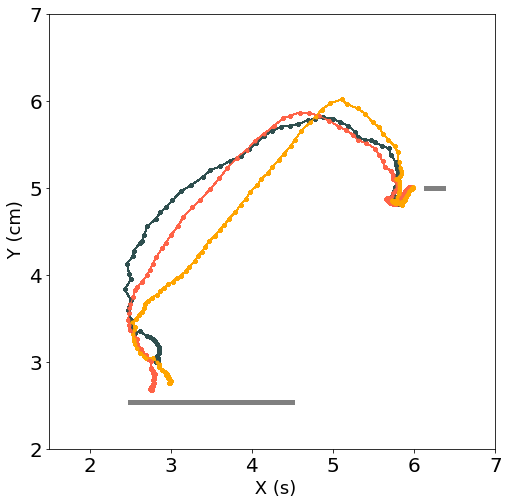

In [17]:
df = pd.read_csv('/home/shiva/Desktop/outputDLC_resnet50_Rat_lever_Sophie_Rat_2Apr12shuffle1_250000.csv',header=[1,2])
pad_left_x = 150; pad_right_x = 270
scale_pix_to_cm = 2/(pad_right_x-pad_left_x)
x = (df['Lfinger0','x'].values)*scale_pix_to_cm
y = (512-df['Lfinger0','y'].values)*scale_pix_to_cm
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), sharey=True)
ax.get_xaxis().set_tick_params(direction='out',labelsize = 20)
ax.xaxis.set_ticks_position('bottom')
ax.get_yaxis().set_tick_params(direction='out',labelsize = 20)
ax.yaxis.set_ticks_position('left')
lever_x = 375*scale_pix_to_cm;lever_y = (512-212)*scale_pix_to_cm
pad_y = (512-360)*scale_pix_to_cm ;pad_left_x = 150*scale_pix_to_cm; pad_right_x = 270*scale_pix_to_cm
plt.plot([lever_x - 0.1, lever_x + 0.1],[lever_y,lever_y],lw = 5, c = 'grey')
plt.plot([pad_left_x,pad_right_x],[pad_y,pad_y],lw = 5, c = 'grey')
plt.xlim(1.5,7)
plt.ylim(2,7)
start= 0; stop= len(x)
#for i in range(0,stop-start):
for i in range(600,len(x)):
    if i%20 == 0:
        print(i)
    plt.plot(x[:225], y[:225], '-o', markersize = 3, lw = 1,c = 'darkslategrey')
    plt.plot(x[225:600], y[225:600], '-o', markersize = 3, lw = 1,c = 'tomato')
    plt.plot(x[600:i], y[600:i], '-o', markersize = 3, lw = 1,c = 'orange')

    plt.ylabel(" Y (cm)",fontsize = 18)
    plt.xlabel(" X (s)",fontsize = 18)
    plt.savefig('/home/shiva/Desktop/tracking_lever/frame'+str(i).zfill(5)+'.png',bbox_inches='tight',orientation='landscape',dpi=300)

# Blah Blah

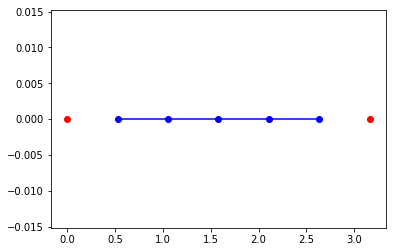

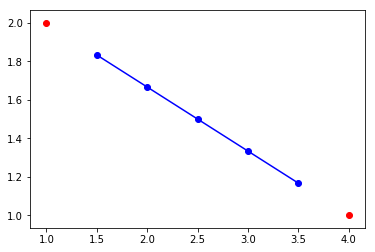

In [71]:
def R_rotation(phi): 
    ''' build rotation matrix R for rotaion of phi around z axis'''
    c, s = np.cos(phi), np.sin(phi)
    R = np.array(((c, s), (-s, c))) # rotation matrix
    return R
def put_n_points_in_between(p1,p2,n_p_between):
    ''' put n_p_between points between p1 and p2 points. Returns a set of x and ys. 
    The points are derived by rotation to put the line on x axis'''
    phi = np.arctan((p2[1]-p1[1])/(p2[0]-p1[0]))
    R = R_rotation(phi)
    p2_prime = np.matmul(R,p2-p1)
    x_p = np.linspace(0, p2_prime[0], num= n_p_between+1, endpoint=False) # produce n points on the line 
    plt.scatter([0,p2_prime[0]],[0,p2_prime[1]], c = 'r')

    points_prime = np.vstack((x_p[1:],np.zeros_like(x_p[1:])))
    plt.plot(points_prime[0,:],points_prime[1,:],'-o',c= 'b')

    points = np.matmul(R_rotation(-phi),points_prime)+p1.reshape(-1,1) # brings points to the original coordinate
    return points
def equidistant_points_between(p1, p2, n_p_between):
    x = np.linspace(p1[0], p2[0], n_p_between+1, endpoint=False)
    y = np.linspace(p1[1], p2[1], n_p_between+1, endpoint=False)
    return np.vstack((x[1:],y[1:]))
p1 = np.array([1,2])
p2 = np.array([4,1])
# plt.figure(1)
points = put_n_points_in_between(p1,p2,5)
# points = equidistant_points_between(p1, p2, 5)
plt.figure(2)
plt.scatter([p1[0],p2[0]],[p1[1],p2[1]], c = 'r')
plt.plot(points[0,:],points[1,:],'-o',c= 'b')





In [16]:
xx = np.arange(64).reshape(8,8)
print(xx)
mask = xx>5
print(mask)
print(xx[mask])
# conc_t = 2
# shifted_forward_x = np.concatenate((np.repeat(xx[:,0].reshape(-1,1),conc_t,axis = 1),xx[:,:-conc_t]),axis = 1) # repeat boundaries to avoid boundary condition
# print(shifted_forward_x)
# print(shifted_forward_x.shape)
# shifted_back_x = np.concatenate((xx[:,conc_t:],np.repeat(xx[:,-1].reshape(-1,1),conc_t,axis = 1)),axis = 1) # repeat boundaries to avoid boundary condition
# print(shifted_back_x)
# print(shifted_back_x.shape)
# velocity = (shifted_back_x - shifted_forward_x)
# print(velocity)

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]]
[[False False False False False False  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62 63]
